In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
#from xgboost import XGBRegressor
from sklearn.preprocessing import minmax_scale,StandardScaler
from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_error
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import LabelEncoder
directory_DRG =r"C:\Users\Admin\Desktop\R10x\DRG"
directory_weather=r"C:\Users\Admin\Desktop\R10x\Weather"
directory_events=r"C:\Users\Admin\Desktop\R10x\Events"

In [4]:
#Merging alll product files into single file
data_Products=pd.DataFrame(columns=['store_id','upc_code','item_name','date','amount','quantity','unit_price','category','size','msu'])
for i in os.listdir(directory_DRG):
    df=pd.read_csv('C:\\Users\\Admin\\Desktop\\R10x\\DRG\\'+str(i))
    #df=df.drop(columns=['size'],axis=1,inplace =True)
    #df.to_csv('C:\\Users\\syed.s\\Documents\\RX100\\DRG\\DRG_updated\\'+str(i))
    data_Products = pd.concat([data_Products,df],ignore_index=True)
    #ddf.append(df)

In [5]:
#Merging alll product files into single file
#weather=pd.DataFrame(columns=['PDT','mintempm','maxtempm','meantempm','mintempi','maxtempi','meantempi','fog','rain','snow','hail','thunder','tornado'])
data_weather=pd.DataFrame()
for i in os.listdir(directory_weather):
    print(i)
    df=pd.read_csv('C:\\Users\\Admin\\Desktop\\R10x\\Weather\\'+str(i),sep=",",header=None)
    #df=df.drop(columns=['size'],axis=1,inplace =True)
    #df.to_csv('C:\\Users\\syed.s\\Documents\\RX100\\DRG\\DRG_updated\\'+str(i))
    data_weather = pd.concat([data_weather,df],ignore_index=True)
    data_weather=data_weather[1:]
    #ddf.append(df)

weather_90.txt


In [6]:
data_weather.columns=['PDT','mintempm','maxtempm','meantempm','mintempi','maxtempi','meantempi','fog','rain','snow','hail','thunder','tornado']

In [7]:
data_weather.head()

,PDT,mintempm,maxtempm,meantempm,mintempi,maxtempi,meantempi,fog,rain,snow,hail,thunder,tornado
1,2014-01-01,0,15,8,32,59,46,0,0,0,0,0,0
2,2014-01-02,2,17,9,35,62,48,0,0,0,0,0,0
3,2014-01-03,3,16,9,37,60,48,0,0,0,0,0,0
4,2014-01-04,3,20,11,37,68,52,1,0,0,0,0,0
5,2014-01-05,1,19,10,33,66,50,0,0,0,0,0,0


In [8]:
data_events=pd.DataFrame(columns=['Date','Day','Event','WeekEnd','Holiday','LongVacation','HighSales'])
for i in os.listdir(directory_events):
    df=pd.read_csv('C:\\Users\\Admin\\Desktop\\R10x\\Events\\'+str(i))
    #df=df.drop(columns=['size'],axis=1,inplace =True)
    #df.to_csv('C:\\Users\\syed.s\\Documents\\RX100\\DRG\\DRG_updated\\'+str(i))
    data_events = pd.concat([data_events,df],ignore_index=True)
    #ddf.append(df)

In [9]:
data_events.head()

,Date,Day,Event,WeekEnd,Holiday,LongVacation,HighSales
0,1/1/2018,Monday,New Year,1,1,1,0
1,2/1/2018,Tuesday,Prior Dia de los Re1 Magos/Three Kings Day,0,0,0,1
2,3/1/2018,Wednesday,Prior Dia de los Re1 Magos/Three Kings Day,0,0,0,1
3,4/1/2018,Thursday,Prior Dia de los Re1 Magos/Three Kings Day,0,0,0,1
4,5/1/2018,Friday,Prior Dia de los Re1 Magos/Three Kings Day,0,0,0,1


In [10]:
data_events.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 281 entries, 0 to 280
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Date          281 non-null    object
 1   Day           281 non-null    object
 2   Event         281 non-null    object
 3   WeekEnd       281 non-null    object
 4   Holiday       281 non-null    object
 5   LongVacation  281 non-null    object
 6   HighSales     281 non-null    object
dtypes: object(7)
memory usage: 15.5+ KB


In [11]:
data_weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1931 entries, 1 to 1931
Data columns (total 13 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   PDT        1931 non-null   object
 1   mintempm   1931 non-null   object
 2   maxtempm   1931 non-null   object
 3   meantempm  1931 non-null   object
 4   mintempi   1931 non-null   object
 5   maxtempi   1931 non-null   object
 6   meantempi  1931 non-null   object
 7   fog        1931 non-null   object
 8   rain       1931 non-null   object
 9   snow       1931 non-null   object
 10  hail       1931 non-null   object
 11  thunder    1931 non-null   object
 12  tornado    1931 non-null   object
dtypes: object(13)
memory usage: 196.2+ KB


In [12]:
data_Products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45734 entries, 0 to 45733
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   store_id    45734 non-null  object 
 1   upc_code    45734 non-null  object 
 2   item_name   45734 non-null  object 
 3   date        45734 non-null  object 
 4   amount      45734 non-null  float64
 5   quantity    45734 non-null  object 
 6   unit_price  45734 non-null  float64
 7   category    0 non-null      float64
 8   size        35537 non-null  object 
 9   msu         45734 non-null  object 
dtypes: float64(3), object(7)
memory usage: 3.5+ MB


In [13]:
data_Products['upc_code'].unique()

array([710114, 711814, 712118, 712415, 712811, 712910, 712927, 713115,
       252174000007, 252175000006, 252176000005, 252179000002,
       257251000000, 257252000009, 257253000008, 257254000007,
       257255000006, 257256000005, 257257000004, 257265000003,
       257266000002, 257267000001, 257268000000, 257272000003,
       271011000000, 271078000005, 271124000003, 271181000008,
       271211000008, 271241000009, 271281000007, 271291000004,
       271292000003, 271311000007], dtype=object)

In [15]:
data_events.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 281 entries, 0 to 280
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Date          281 non-null    object
 1   Day           281 non-null    object
 2   Event         281 non-null    object
 3   WeekEnd       281 non-null    object
 4   Holiday       281 non-null    object
 5   LongVacation  281 non-null    object
 6   HighSales     281 non-null    object
dtypes: object(7)
memory usage: 15.5+ KB


In [289]:
data_400=pd.read_csv('data_4001.csv')

In [271]:
data_400['upc_code']=data_400['upc_code'].astype(str).str[:-1].astype(np.int64)

In [290]:
data_400.head()

,Unnamed: 0,store_id,upc_code,item_name,date,amount,quantity,unit_price,category,size,...,mintempi,maxtempi,meantempi,fog,rain,snow,hail,thunder,tornado,Temp_Types
0,1563,90,710114,SWEET BAGUETTE,2018-05-01,26.91,9,2.99,NaN,Each,...,NaN,NaN,63,NaN,NaN,NaN,NaN,NaN,NaN,MODERATE
1,1564,90,710114,SWEET BAGUETTE,2018-05-02,62.79,21,2.99,NaN,Each,...,NaN,NaN,63,NaN,NaN,NaN,NaN,NaN,NaN,MODERATE
2,1565,90,710114,SWEET BAGUETTE,2018-05-03,56.81,19,2.99,NaN,Each,...,NaN,NaN,63,NaN,NaN,NaN,NaN,NaN,NaN,MODERATE
3,1566,90,710114,SWEET BAGUETTE,2018-05-04,71.76,24,2.99,NaN,Each,...,NaN,NaN,63,NaN,NaN,NaN,NaN,NaN,NaN,MODERATE
4,1567,90,710114,SWEET BAGUETTE,2018-05-05,107.64,36,2.99,NaN,Each,...,NaN,NaN,63,NaN,NaN,NaN,NaN,NaN,NaN,MODERATE


In [291]:
type(data_400['upc_code'])

pandas.core.series.Series

In [292]:
data_trans=pd.read_csv('transaction.csv')

In [293]:
data_trans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421 entries, 0 to 420
Data columns (total 3 columns):
Unnamed: 0    421 non-null int64
date          421 non-null object
count         421 non-null int64
dtypes: int64(2), object(1)
memory usage: 9.9+ KB


In [294]:
data_rem=pd.read_csv('remaining.csv')

In [295]:
data_rem.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34 entries, 0 to 33
Data columns (total 6 columns):
Unnamed: 0      34 non-null int64
upc_code        34 non-null int64
unit_price_x    33 non-null float64
unit_price_y    33 non-null float64
average         32 non-null float64
percentage      32 non-null float64
dtypes: float64(4), int64(2)
memory usage: 1.7 KB


In [296]:
data_rem.head()

,Unnamed: 0,upc_code,unit_price_x,unit_price_y,average,percentage
0,0,710114,3.103521,3.25,0.15,4.838710
1,1,711814,4.696479,4.95,0.25,5.319149
2,2,712118,4.393895,4.25,-0.14,-3.189066
3,3,712415,3.103521,3.25,0.15,4.838710
4,4,712811,4.689096,4.95,0.26,5.543710


In [297]:
data_trans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421 entries, 0 to 420
Data columns (total 3 columns):
Unnamed: 0    421 non-null int64
date          421 non-null object
count         421 non-null int64
dtypes: int64(2), object(1)
memory usage: 9.9+ KB


In [298]:
data_400.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9580 entries, 0 to 9579
Data columns (total 25 columns):
Unnamed: 0    9580 non-null int64
store_id      9580 non-null int64
upc_code      9580 non-null int64
item_name     9580 non-null object
date          9580 non-null object
amount        9580 non-null float64
quantity      9580 non-null int64
unit_price    9580 non-null float64
category      0 non-null float64
size          7564 non-null object
msu           9580 non-null int64
PDT           8678 non-null object
mintempm      8678 non-null float64
maxtempm      8678 non-null float64
meantempm     8678 non-null float64
mintempi      8678 non-null float64
maxtempi      8678 non-null float64
meantempi     9580 non-null int64
fog           8678 non-null float64
rain          8678 non-null float64
snow          8678 non-null float64
hail          8678 non-null float64
thunder       8678 non-null float64
tornado       8678 non-null float64
Temp_Types    9580 non-null object
dtypes: float

In [299]:
data_400['date']= pd.to_datetime(data_400['date'])

In [300]:
data_400.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9580 entries, 0 to 9579
Data columns (total 25 columns):
Unnamed: 0    9580 non-null int64
store_id      9580 non-null int64
upc_code      9580 non-null int64
item_name     9580 non-null object
date          9580 non-null datetime64[ns]
amount        9580 non-null float64
quantity      9580 non-null int64
unit_price    9580 non-null float64
category      0 non-null float64
size          7564 non-null object
msu           9580 non-null int64
PDT           8678 non-null object
mintempm      8678 non-null float64
maxtempm      8678 non-null float64
meantempm     8678 non-null float64
mintempi      8678 non-null float64
maxtempi      8678 non-null float64
meantempi     9580 non-null int64
fog           8678 non-null float64
rain          8678 non-null float64
snow          8678 non-null float64
hail          8678 non-null float64
thunder       8678 non-null float64
tornado       8678 non-null float64
Temp_Types    9580 non-null object
dtype

In [119]:
data_events.rename(columns={'Date':'date'},inplace=True)

In [301]:
from datetime import datetime

In [302]:
data_events.head()

,date,Day,Event,WeekEnd,Holiday,LongVacation,HighSales
0,2018-01-01,Monday,New Year,1,1,1,0
1,2018-01-02,Tuesday,Prior Dia de los Re1 Magos/Three Kings Day,0,0,0,1
2,2018-01-03,Wednesday,Prior Dia de los Re1 Magos/Three Kings Day,0,0,0,1
3,2018-01-04,Thursday,Prior Dia de los Re1 Magos/Three Kings Day,0,0,0,1
4,2018-01-05,Friday,Prior Dia de los Re1 Magos/Three Kings Day,0,0,0,1


In [303]:
data_400.head()

,Unnamed: 0,store_id,upc_code,item_name,date,amount,quantity,unit_price,category,size,...,mintempi,maxtempi,meantempi,fog,rain,snow,hail,thunder,tornado,Temp_Types
0,1563,90,710114,SWEET BAGUETTE,2018-05-01,26.91,9,2.99,NaN,Each,...,NaN,NaN,63,NaN,NaN,NaN,NaN,NaN,NaN,MODERATE
1,1564,90,710114,SWEET BAGUETTE,2018-05-02,62.79,21,2.99,NaN,Each,...,NaN,NaN,63,NaN,NaN,NaN,NaN,NaN,NaN,MODERATE
2,1565,90,710114,SWEET BAGUETTE,2018-05-03,56.81,19,2.99,NaN,Each,...,NaN,NaN,63,NaN,NaN,NaN,NaN,NaN,NaN,MODERATE
3,1566,90,710114,SWEET BAGUETTE,2018-05-04,71.76,24,2.99,NaN,Each,...,NaN,NaN,63,NaN,NaN,NaN,NaN,NaN,NaN,MODERATE
4,1567,90,710114,SWEET BAGUETTE,2018-05-05,107.64,36,2.99,NaN,Each,...,NaN,NaN,63,NaN,NaN,NaN,NaN,NaN,NaN,MODERATE


In [304]:
final_data=pd.merge(data_400,data_events,how='left',on='date')

In [305]:
final_data.head()

,Unnamed: 0,store_id,upc_code,item_name,date,amount,quantity,unit_price,category,size,...,hail,thunder,tornado,Temp_Types,Day,Event,WeekEnd,Holiday,LongVacation,HighSales
0,1563,90,710114,SWEET BAGUETTE,2018-05-01,26.91,9,2.99,NaN,Each,...,NaN,NaN,NaN,MODERATE,NaN,NaN,NaN,NaN,NaN,NaN
1,1564,90,710114,SWEET BAGUETTE,2018-05-02,62.79,21,2.99,NaN,Each,...,NaN,NaN,NaN,MODERATE,Wednesday,Prior Cinco de Mayo,0,0,0,0
2,1565,90,710114,SWEET BAGUETTE,2018-05-03,56.81,19,2.99,NaN,Each,...,NaN,NaN,NaN,MODERATE,Thursday,Prior Cinco de Mayo,0,0,0,0
3,1566,90,710114,SWEET BAGUETTE,2018-05-04,71.76,24,2.99,NaN,Each,...,NaN,NaN,NaN,MODERATE,Friday,Prior Cinco de Mayo,0,0,0,0
4,1567,90,710114,SWEET BAGUETTE,2018-05-05,107.64,36,2.99,NaN,Each,...,NaN,NaN,NaN,MODERATE,Saturday,Cinco de Mayo,0,0,0,1


In [306]:
final_data[['date','Event']].head()

,date,Event
0,2018-05-01,NaN
1,2018-05-02,Prior Cinco de Mayo
2,2018-05-03,Prior Cinco de Mayo
3,2018-05-04,Prior Cinco de Mayo
4,2018-05-05,Cinco de Mayo


In [307]:
final_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9580 entries, 0 to 9579
Data columns (total 31 columns):
Unnamed: 0      9580 non-null int64
store_id        9580 non-null int64
upc_code        9580 non-null int64
item_name       9580 non-null object
date            9580 non-null datetime64[ns]
amount          9580 non-null float64
quantity        9580 non-null int64
unit_price      9580 non-null float64
category        0 non-null float64
size            7564 non-null object
msu             9580 non-null int64
PDT             8678 non-null object
mintempm        8678 non-null float64
maxtempm        8678 non-null float64
meantempm       8678 non-null float64
mintempi        8678 non-null float64
maxtempi        8678 non-null float64
meantempi       9580 non-null int64
fog             8678 non-null float64
rain            8678 non-null float64
snow            8678 non-null float64
hail            8678 non-null float64
thunder         8678 non-null float64
tornado         8678 non-null 

In [308]:
len(final_data['upc_code'].unique())

34

In [309]:
def day_week(date):
    date=pd.Timestamp(date)
    day=date.dayofweek
    return day

In [310]:
final_data['day']=final_data['date'].apply(day_week)

In [311]:
final_data=final_data.drop(columns=['Day'])

In [131]:
final_data

,Unnamed: 0,store_id,upc_code,item_name,date,amount,quantity,unit_price,category,size,...,hail,thunder,tornado,Temp_Types,Event,WeekEnd,Holiday,LongVacation,HighSales,day
0,1563,90,710114,SWEET BAGUETTE,2018-05-01,26.91,9,2.99,NaN,Each,...,NaN,NaN,NaN,MODERATE,NaN,NaN,NaN,NaN,NaN,1
1,1564,90,710114,SWEET BAGUETTE,2018-05-02,62.79,21,2.99,NaN,Each,...,NaN,NaN,NaN,MODERATE,Prior Cinco de Mayo,0,0,0,0,2
2,1565,90,710114,SWEET BAGUETTE,2018-05-03,56.81,19,2.99,NaN,Each,...,NaN,NaN,NaN,MODERATE,Prior Cinco de Mayo,0,0,0,0,3
3,1566,90,710114,SWEET BAGUETTE,2018-05-04,71.76,24,2.99,NaN,Each,...,NaN,NaN,NaN,MODERATE,Prior Cinco de Mayo,0,0,0,0,4
4,1567,90,710114,SWEET BAGUETTE,2018-05-05,107.64,36,2.99,NaN,Each,...,NaN,NaN,NaN,MODERATE,Cinco de Mayo,0,0,0,1,5
5,1568,90,710114,SWEET BAGUETTE,2018-05-06,59.80,20,2.99,NaN,Each,...,NaN,NaN,NaN,MODERATE,Prior Mother's day,1,0,0,1,6
6,1569,90,710114,SWEET BAGUETTE,2018-05-07,20.93,7,2.99,NaN,Each,...,NaN,NaN,NaN,MODERATE,Prior Mother's day,0,0,0,0,0
7,1570,90,710114,SWEET BAGUETTE,2018-05-08,38.87,13,2.99,NaN,Each,...,NaN,NaN,NaN,MODERATE,Prior Mother's day,0,0,0,0,1
8,1571,90,710114,SWEET BAGUETTE,2018-05-09,68.77,23,2.99,NaN,Each,...,NaN,NaN,NaN,MODERATE,Prior Mother's day,0,0,0,0,2
9,1572,90,710114,SWEET BAGUETTE,2018-05-10,35.88,12,2.99,NaN,Each,...,NaN,NaN,NaN,MODERATE,Prior Mother's day,0,0,0,1,3


In [312]:
final_data['Event'].fillna(value='No Event',inplace=True)

In [313]:
final_data.fillna(value=0,inplace=True)

In [314]:
final_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9580 entries, 0 to 9579
Data columns (total 31 columns):
Unnamed: 0      9580 non-null int64
store_id        9580 non-null int64
upc_code        9580 non-null int64
item_name       9580 non-null object
date            9580 non-null datetime64[ns]
amount          9580 non-null float64
quantity        9580 non-null int64
unit_price      9580 non-null float64
category        9580 non-null float64
size            9580 non-null object
msu             9580 non-null int64
PDT             9580 non-null object
mintempm        9580 non-null float64
maxtempm        9580 non-null float64
meantempm       9580 non-null float64
mintempi        9580 non-null float64
maxtempi        9580 non-null float64
meantempi       9580 non-null int64
fog             9580 non-null float64
rain            9580 non-null float64
snow            9580 non-null float64
hail            9580 non-null float64
thunder         9580 non-null float64
tornado         9580 non-nu

In [315]:
data_trans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421 entries, 0 to 420
Data columns (total 3 columns):
Unnamed: 0    421 non-null int64
date          421 non-null object
count         421 non-null int64
dtypes: int64(2), object(1)
memory usage: 9.9+ KB


In [316]:
data_trans.head()

,Unnamed: 0,date,count
0,0,2018-05-01,1722
1,1,2018-05-02,1647
2,2,2018-05-03,1778
3,3,2018-05-04,1781
4,4,2018-05-05,1833


In [317]:
data_trans['date']=pd.to_datetime(data_trans['date'])

In [318]:
final_data_tran=pd.merge(final_data,data_trans,how='left',on='date')

In [319]:
final_data_tran.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9580 entries, 0 to 9579
Data columns (total 33 columns):
Unnamed: 0_x    9580 non-null int64
store_id        9580 non-null int64
upc_code        9580 non-null int64
item_name       9580 non-null object
date            9580 non-null datetime64[ns]
amount          9580 non-null float64
quantity        9580 non-null int64
unit_price      9580 non-null float64
category        9580 non-null float64
size            9580 non-null object
msu             9580 non-null int64
PDT             9580 non-null object
mintempm        9580 non-null float64
maxtempm        9580 non-null float64
meantempm       9580 non-null float64
mintempi        9580 non-null float64
maxtempi        9580 non-null float64
meantempi       9580 non-null int64
fog             9580 non-null float64
rain            9580 non-null float64
snow            9580 non-null float64
hail            9580 non-null float64
thunder         9580 non-null float64
tornado         9580 non-nu

In [320]:
data_rem.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34 entries, 0 to 33
Data columns (total 6 columns):
Unnamed: 0      34 non-null int64
upc_code        34 non-null int64
unit_price_x    33 non-null float64
unit_price_y    33 non-null float64
average         32 non-null float64
percentage      32 non-null float64
dtypes: float64(4), int64(2)
memory usage: 1.7 KB


In [321]:
final_data_tran.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9580 entries, 0 to 9579
Data columns (total 33 columns):
Unnamed: 0_x    9580 non-null int64
store_id        9580 non-null int64
upc_code        9580 non-null int64
item_name       9580 non-null object
date            9580 non-null datetime64[ns]
amount          9580 non-null float64
quantity        9580 non-null int64
unit_price      9580 non-null float64
category        9580 non-null float64
size            9580 non-null object
msu             9580 non-null int64
PDT             9580 non-null object
mintempm        9580 non-null float64
maxtempm        9580 non-null float64
meantempm       9580 non-null float64
mintempi        9580 non-null float64
maxtempi        9580 non-null float64
meantempi       9580 non-null int64
fog             9580 non-null float64
rain            9580 non-null float64
snow            9580 non-null float64
hail            9580 non-null float64
thunder         9580 non-null float64
tornado         9580 non-nu

In [322]:
final_data_rem=pd.merge(final_data_tran,data_rem,how='left',on='upc_code')

In [324]:
final_data_rem[final_data_rem['upc_code']==271181000000]

,Unnamed: 0_x,store_id,upc_code,item_name,date,amount,quantity,unit_price,category,size,...,LongVacation,HighSales,day,Unnamed: 0_y,count,Unnamed: 0,unit_price_x,unit_price_y,average,percentage


In [323]:
len(final_data_rem['upc_code'].unique())

34

In [325]:
final_data_rem

,Unnamed: 0_x,store_id,upc_code,item_name,date,amount,quantity,unit_price,category,size,...,LongVacation,HighSales,day,Unnamed: 0_y,count,Unnamed: 0,unit_price_x,unit_price_y,average,percentage
0,1563,90,710114,SWEET BAGUETTE,2018-05-01,26.91,9,2.99,0.0,Each,...,0,0,1,0,1722,0,3.103521,3.250000,0.15,4.838710
1,1564,90,710114,SWEET BAGUETTE,2018-05-02,62.79,21,2.99,0.0,Each,...,0,0,2,1,1647,0,3.103521,3.250000,0.15,4.838710
2,1565,90,710114,SWEET BAGUETTE,2018-05-03,56.81,19,2.99,0.0,Each,...,0,0,3,2,1778,0,3.103521,3.250000,0.15,4.838710
3,1566,90,710114,SWEET BAGUETTE,2018-05-04,71.76,24,2.99,0.0,Each,...,0,0,4,3,1781,0,3.103521,3.250000,0.15,4.838710
4,1567,90,710114,SWEET BAGUETTE,2018-05-05,107.64,36,2.99,0.0,Each,...,0,1,5,4,1833,0,3.103521,3.250000,0.15,4.838710
5,1568,90,710114,SWEET BAGUETTE,2018-05-06,59.80,20,2.99,0.0,Each,...,0,1,6,5,1793,0,3.103521,3.250000,0.15,4.838710
6,1569,90,710114,SWEET BAGUETTE,2018-05-07,20.93,7,2.99,0.0,Each,...,0,0,0,6,1736,0,3.103521,3.250000,0.15,4.838710
7,1570,90,710114,SWEET BAGUETTE,2018-05-08,38.87,13,2.99,0.0,Each,...,0,0,1,7,1668,0,3.103521,3.250000,0.15,4.838710
8,1571,90,710114,SWEET BAGUETTE,2018-05-09,68.77,23,2.99,0.0,Each,...,0,0,2,8,1758,0,3.103521,3.250000,0.15,4.838710
9,1572,90,710114,SWEET BAGUETTE,2018-05-10,35.88,12,2.99,0.0,Each,...,0,1,3,9,1737,0,3.103521,3.250000,0.15,4.838710


In [326]:
final_data_rem.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9580 entries, 0 to 9579
Data columns (total 38 columns):
Unnamed: 0_x    9580 non-null int64
store_id        9580 non-null int64
upc_code        9580 non-null int64
item_name       9580 non-null object
date            9580 non-null datetime64[ns]
amount          9580 non-null float64
quantity        9580 non-null int64
unit_price      9580 non-null float64
category        9580 non-null float64
size            9580 non-null object
msu             9580 non-null int64
PDT             9580 non-null object
mintempm        9580 non-null float64
maxtempm        9580 non-null float64
meantempm       9580 non-null float64
mintempi        9580 non-null float64
maxtempi        9580 non-null float64
meantempi       9580 non-null int64
fog             9580 non-null float64
rain            9580 non-null float64
snow            9580 non-null float64
hail            9580 non-null float64
thunder         9580 non-null float64
tornado         9580 non-nu

In [327]:
final_data_rem.dropna(inplace=True)

In [328]:
final_data_rem.drop(['Unnamed: 0_x','Unnamed: 0_y','Unnamed: 0'],axis=1,inplace=True)

In [329]:
final_data_rem.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9577 entries, 0 to 9579
Data columns (total 35 columns):
store_id        9577 non-null int64
upc_code        9577 non-null int64
item_name       9577 non-null object
date            9577 non-null datetime64[ns]
amount          9577 non-null float64
quantity        9577 non-null int64
unit_price      9577 non-null float64
category        9577 non-null float64
size            9577 non-null object
msu             9577 non-null int64
PDT             9577 non-null object
mintempm        9577 non-null float64
maxtempm        9577 non-null float64
meantempm       9577 non-null float64
mintempi        9577 non-null float64
maxtempi        9577 non-null float64
meantempi       9577 non-null int64
fog             9577 non-null float64
rain            9577 non-null float64
snow            9577 non-null float64
hail            9577 non-null float64
thunder         9577 non-null float64
tornado         9577 non-null float64
Temp_Types      9577 non-

In [330]:
final_data_rem.columns

Index(['store_id', 'upc_code', 'item_name', 'date', 'amount', 'quantity',
       'unit_price', 'category', 'size', 'msu', 'PDT', 'mintempm', 'maxtempm',
       'meantempm', 'mintempi', 'maxtempi', 'meantempi', 'fog', 'rain', 'snow',
       'hail', 'thunder', 'tornado', 'Temp_Types', 'Event', 'WeekEnd',
       'Holiday', 'LongVacation', 'HighSales', 'day', 'count', 'unit_price_x',
       'unit_price_y', 'average', 'percentage'],
      dtype='object')

In [331]:
final_data_rem.to_csv('final_data_rem.csv')

In [332]:
def caluculte_store_size(value):
    if value > 2000:
        return 3
    elif value >=1500 and value <= 2000:
        return 2
    else:
        return 1

In [333]:
final_data_rem['Store_size']=final_data_rem['count'].apply(caluculte_store_size)

In [334]:
len(final_data_rem[final_data_rem['Store_size']==3])

682

In [335]:
final_data_rem

,store_id,upc_code,item_name,date,amount,quantity,unit_price,category,size,msu,...,Holiday,LongVacation,HighSales,day,count,unit_price_x,unit_price_y,average,percentage,Store_size
0,90,710114,SWEET BAGUETTE,2018-05-01,26.91,9,2.99,0.0,Each,1,...,0,0,0,1,1722,3.103521,3.250000,0.15,4.838710,2
1,90,710114,SWEET BAGUETTE,2018-05-02,62.79,21,2.99,0.0,Each,1,...,0,0,0,2,1647,3.103521,3.250000,0.15,4.838710,2
2,90,710114,SWEET BAGUETTE,2018-05-03,56.81,19,2.99,0.0,Each,1,...,0,0,0,3,1778,3.103521,3.250000,0.15,4.838710,2
3,90,710114,SWEET BAGUETTE,2018-05-04,71.76,24,2.99,0.0,Each,1,...,0,0,0,4,1781,3.103521,3.250000,0.15,4.838710,2
4,90,710114,SWEET BAGUETTE,2018-05-05,107.64,36,2.99,0.0,Each,1,...,0,0,1,5,1833,3.103521,3.250000,0.15,4.838710,2
5,90,710114,SWEET BAGUETTE,2018-05-06,59.80,20,2.99,0.0,Each,1,...,0,0,1,6,1793,3.103521,3.250000,0.15,4.838710,2
6,90,710114,SWEET BAGUETTE,2018-05-07,20.93,7,2.99,0.0,Each,1,...,0,0,0,0,1736,3.103521,3.250000,0.15,4.838710,2
7,90,710114,SWEET BAGUETTE,2018-05-08,38.87,13,2.99,0.0,Each,1,...,0,0,0,1,1668,3.103521,3.250000,0.15,4.838710,2
8,90,710114,SWEET BAGUETTE,2018-05-09,68.77,23,2.99,0.0,Each,1,...,0,0,0,2,1758,3.103521,3.250000,0.15,4.838710,2
9,90,710114,SWEET BAGUETTE,2018-05-10,35.88,12,2.99,0.0,Each,1,...,0,0,1,3,1737,3.103521,3.250000,0.15,4.838710,2


In [336]:
final_data_rem[final_data_rem['date'] >= '2019-02-01'].to_csv('fortesting.csv')

In [337]:
len(final_data_rem)

9577

In [338]:
final_data_rem.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9577 entries, 0 to 9579
Data columns (total 36 columns):
store_id        9577 non-null int64
upc_code        9577 non-null int64
item_name       9577 non-null object
date            9577 non-null datetime64[ns]
amount          9577 non-null float64
quantity        9577 non-null int64
unit_price      9577 non-null float64
category        9577 non-null float64
size            9577 non-null object
msu             9577 non-null int64
PDT             9577 non-null object
mintempm        9577 non-null float64
maxtempm        9577 non-null float64
meantempm       9577 non-null float64
mintempi        9577 non-null float64
maxtempi        9577 non-null float64
meantempi       9577 non-null int64
fog             9577 non-null float64
rain            9577 non-null float64
snow            9577 non-null float64
hail            9577 non-null float64
thunder         9577 non-null float64
tornado         9577 non-null float64
Temp_Types      9577 non-

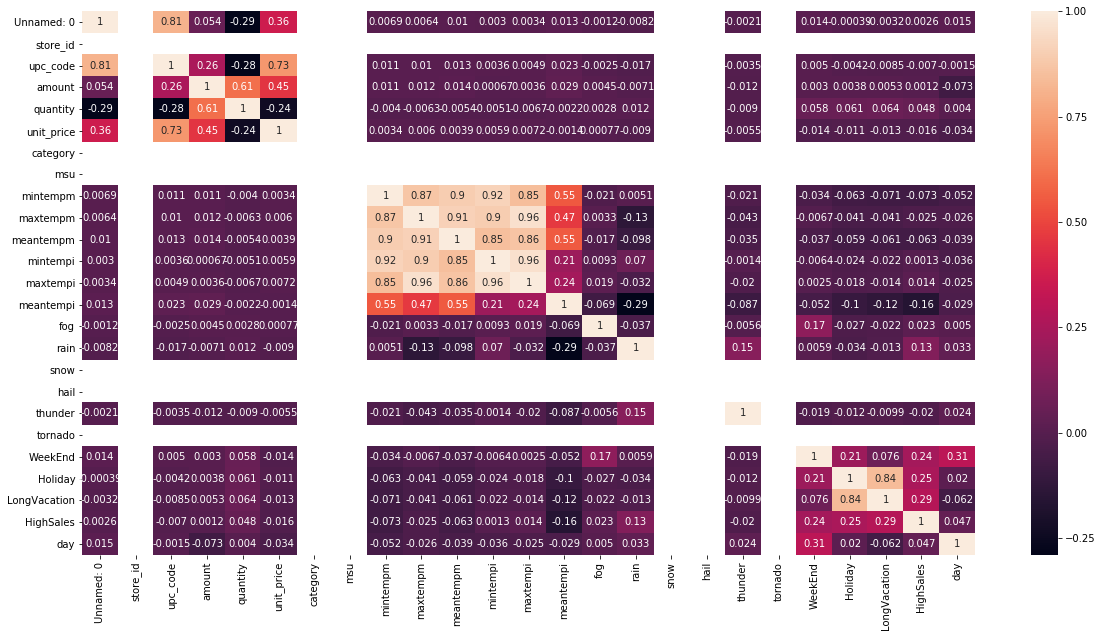

In [222]:
plt.figure(figsize=(20,10))
sns.heatmap(final_data.corr(),annot=True)

In [ ]:
heatmap(final_data.corr(),annot=True)

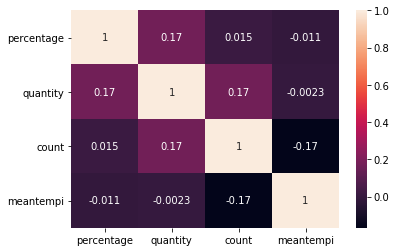

In [235]:
sns.heatmap(final_data_rem[['percentage','quantity','count','meantempi']].corr(),annot=True)

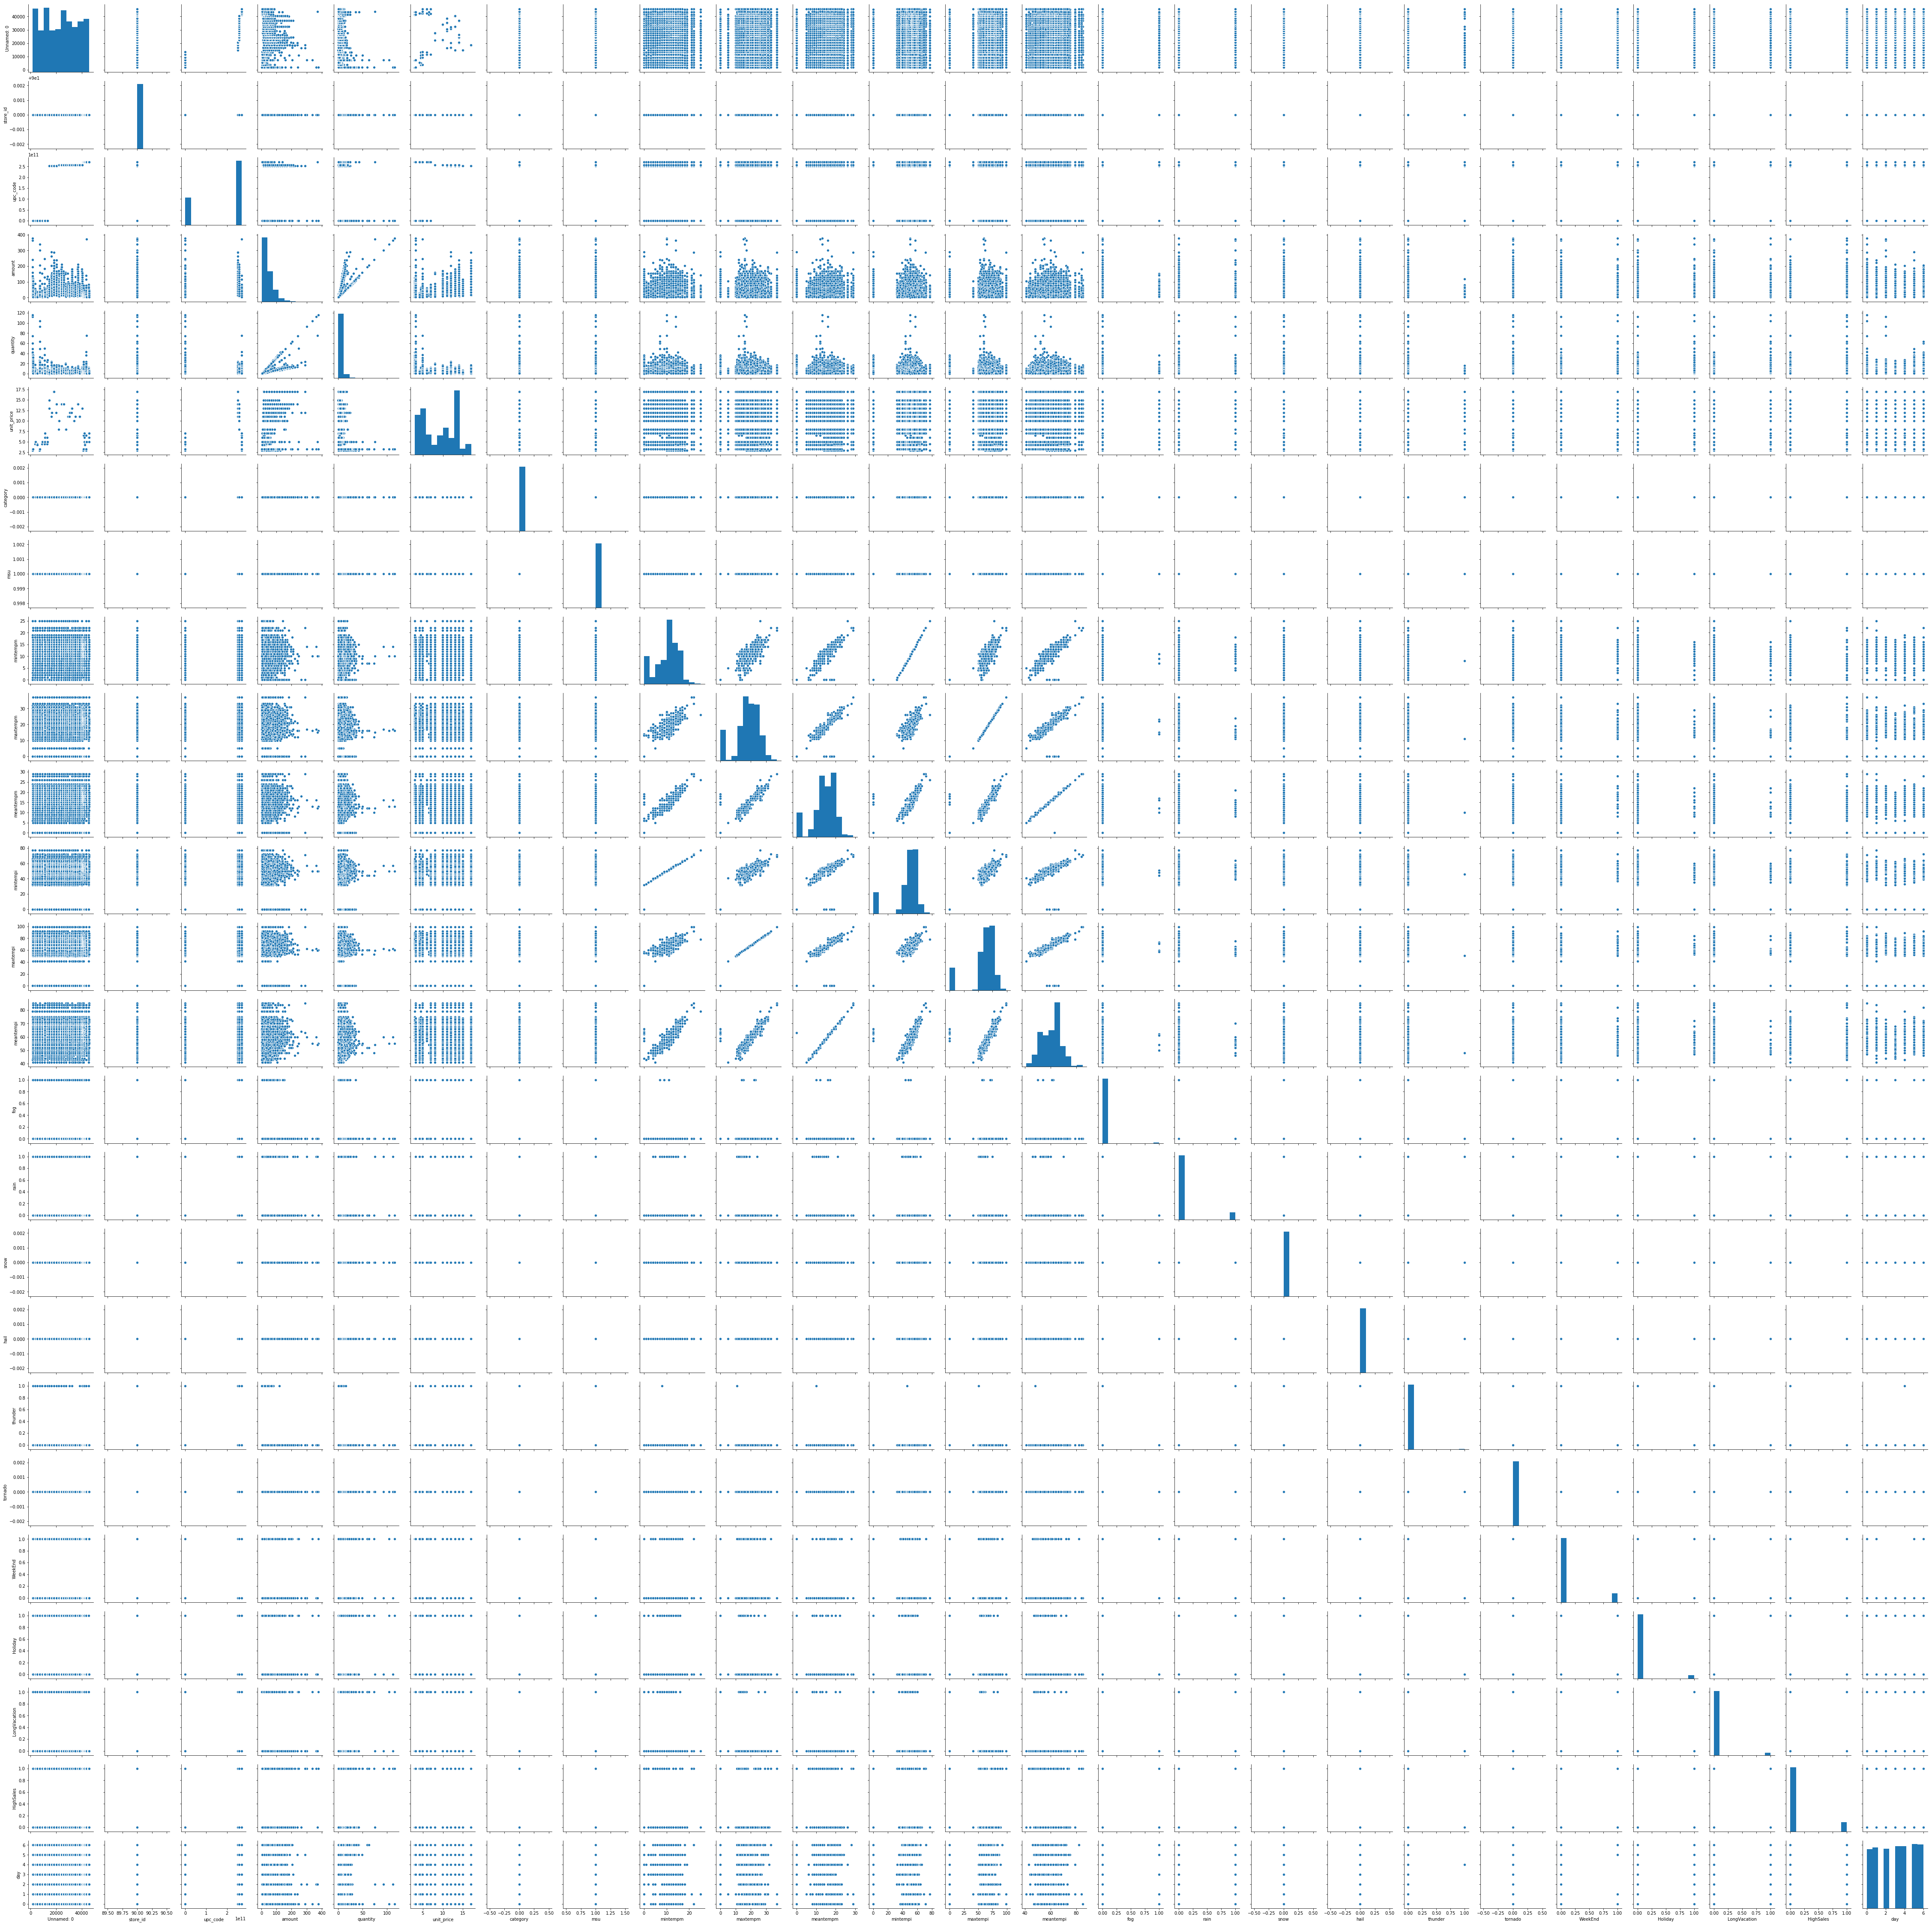

In [223]:
sns.pairplot(x='count',y='quantity'final_data_rem[['count',y='quantity'']])

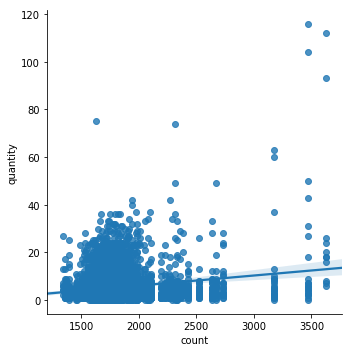

In [228]:
sns.lmplot(x='count',y='quantity',data=final_data_rem)

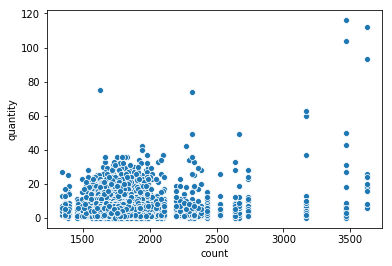

In [226]:
sns.scatterplot(x='count',y='quantity',data=final_data_rem)

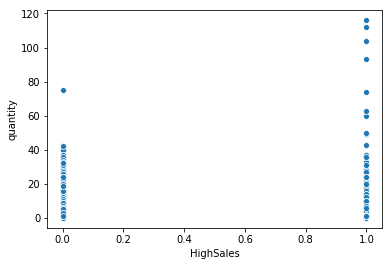

In [66]:
sns.scatterplot(x='HighSales',y='quantity',data=final_data)

In [56]:
corr=final_data[['quantity','meantempi']].corr()

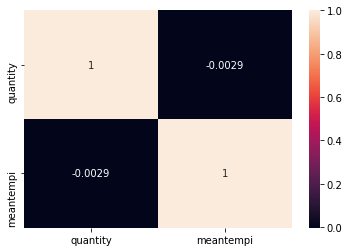

In [57]:
sns.heatmap(corr,annot=True)

In [339]:
final_data_rem.columns

Index(['store_id', 'upc_code', 'item_name', 'date', 'amount', 'quantity',
       'unit_price', 'category', 'size', 'msu', 'PDT', 'mintempm', 'maxtempm',
       'meantempm', 'mintempi', 'maxtempi', 'meantempi', 'fog', 'rain', 'snow',
       'hail', 'thunder', 'tornado', 'Temp_Types', 'Event', 'WeekEnd',
       'Holiday', 'LongVacation', 'HighSales', 'day', 'count', 'unit_price_x',
       'unit_price_y', 'average', 'percentage', 'Store_size'],
      dtype='object')

In [340]:
def percentage_stat(value):
    if value >=0:
        return 1
    else:
        return 0

In [341]:
final_data_rem['Percentage_status']=final_data_rem['percentage'].apply(percentage_stat)

In [342]:
final_data_rem[final_data_rem['Percentage_status']==0]['percentage']

831    -3.189066
832    -3.189066
833    -3.189066
834    -3.189066
835    -3.189066
836    -3.189066
837    -3.189066
838    -3.189066
839    -3.189066
840    -3.189066
841    -3.189066
842    -3.189066
843    -3.189066
844    -3.189066
845    -3.189066
846    -3.189066
847    -3.189066
848    -3.189066
849    -3.189066
850    -3.189066
851    -3.189066
852    -3.189066
853    -3.189066
854    -3.189066
855    -3.189066
856    -3.189066
857    -3.189066
858    -3.189066
859    -3.189066
860    -3.189066
          ...   
1177   -3.189066
1178   -3.189066
1179   -3.189066
8927   -1.162791
8928   -1.162791
8929   -1.162791
8930   -1.162791
8931   -1.162791
8932   -1.162791
8933   -1.162791
8934   -1.162791
8935   -1.162791
9562   -9.506399
9563   -9.506399
9564   -9.506399
9565   -9.506399
9566   -9.506399
9567   -9.506399
9568   -9.506399
9569   -9.506399
9570   -9.506399
9571   -9.506399
9572   -9.506399
9573   -9.506399
9574   -9.506399
9575   -9.506399
9576   -9.506399
9577   -9.5063

# Feature Scaling

In [343]:
data=final_data_rem[['store_id','date','upc_code','quantity','meantempi','Temp_Types', 'Event', 'WeekEnd','Holiday', 'LongVacation', 'HighSales', 'day', 'count', 'unit_price_x',
       'unit_price_y', 'average', 'percentage', 'Store_size','Percentage_status']]

In [344]:
temp=LabelEncoder()

In [345]:
from pandas.api.types import CategoricalDtype

In [346]:
dictTempLabels = {'V_COLD':[-10,40],
                'COLD':[40,60],
                'MODERATE':[60,80],
               'HOT':[80,100],
             'V_HOT':[100,150]}

In [347]:
cat_type = CategoricalDtype(categories=list(dictTempLabels.keys()))

In [348]:
data['Temp_Types']=data['Temp_Types'].astype(cat_type)

C:\Users\syed.s\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [349]:
cat_type = CategoricalDtype(categories=list(data['upc_code'].unique()))

In [350]:
data['upc_code']=data['upc_code'].astype(cat_type)

C:\Users\syed.s\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [351]:
cat_type = CategoricalDtype(categories=list(data['Event'].unique()))

In [352]:
data['Event']=data['Event'].astype(cat_type)

C:\Users\syed.s\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [353]:
transform_data=pd.get_dummies(data,columns=['Temp_Types','upc_code','Event'],drop_first=True)

In [354]:
transform_data.columns

Index(['store_id', 'date', 'quantity', 'meantempi', 'WeekEnd', 'Holiday',
       'LongVacation', 'HighSales', 'day', 'count', 'unit_price_x',
       'unit_price_y', 'average', 'percentage', 'Store_size',
       'Percentage_status', 'Temp_Types_COLD', 'Temp_Types_MODERATE',
       'Temp_Types_HOT', 'Temp_Types_V_HOT', 'upc_code_711814',
       'upc_code_712118', 'upc_code_712415', 'upc_code_712811',
       'upc_code_712910', 'upc_code_712927', 'upc_code_713115',
       'upc_code_252174000007', 'upc_code_252175000006',
       'upc_code_252176000005', 'upc_code_252179000002',
       'upc_code_257251000000', 'upc_code_257252000009',
       'upc_code_257253000008', 'upc_code_257254000007',
       'upc_code_257255000006', 'upc_code_257256000005',
       'upc_code_257257000004', 'upc_code_257265000003',
       'upc_code_257266000002', 'upc_code_257267000001',
       'upc_code_257268000000', 'upc_code_257272000003',
       'upc_code_271011000000', 'upc_code_271078000005',
       'upc_code_2712

In [355]:
transform_data[transform_data['date']>='2019-02-01'].to_csv('transformevents_data.csv')

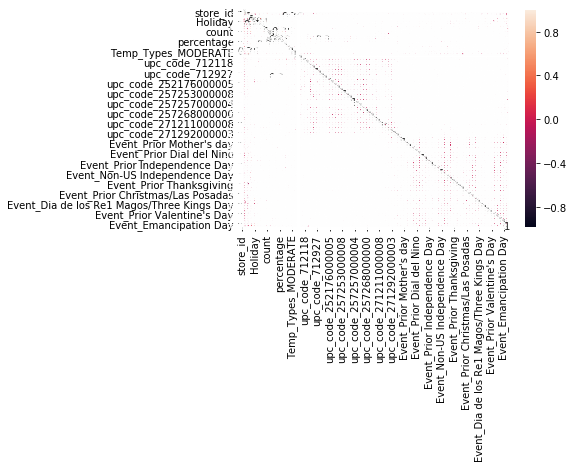

In [356]:
sns.heatmap(transform_data.corr(),annot=True)

In [357]:
X=transform_data.drop(columns=['date','store_id','quantity','unit_price_x',
       'unit_price_y', 'average'])

In [358]:
X.head()

,meantempi,WeekEnd,Holiday,LongVacation,HighSales,day,count,percentage,Store_size,Percentage_status,...,Event_Dia de los Re1 Magos/Three Kings Day,Event_Martin Luther King Day,Event_Prior Super Bowl,Event_Super Bowl,Event_Prior Valentine's Day,Event_Valentine's Day,Event_Presidents' Day,Event_Prior Easter,Event_Emancipation Day,Event_Easter
0,63,0,0,0,0,1,1722,4.83871,2,1,...,0,0,0,0,0,0,0,0,0,0
1,63,0,0,0,0,2,1647,4.83871,2,1,...,0,0,0,0,0,0,0,0,0,0
2,63,0,0,0,0,3,1778,4.83871,2,1,...,0,0,0,0,0,0,0,0,0,0
3,63,0,0,0,0,4,1781,4.83871,2,1,...,0,0,0,0,0,0,0,0,0,0
4,63,0,0,0,1,5,1833,4.83871,2,1,...,0,0,0,0,0,0,0,0,0,0


In [359]:
X.columns

Index(['meantempi', 'WeekEnd', 'Holiday', 'LongVacation', 'HighSales', 'day',
       'count', 'percentage', 'Store_size', 'Percentage_status',
       'Temp_Types_COLD', 'Temp_Types_MODERATE', 'Temp_Types_HOT',
       'Temp_Types_V_HOT', 'upc_code_711814', 'upc_code_712118',
       'upc_code_712415', 'upc_code_712811', 'upc_code_712910',
       'upc_code_712927', 'upc_code_713115', 'upc_code_252174000007',
       'upc_code_252175000006', 'upc_code_252176000005',
       'upc_code_252179000002', 'upc_code_257251000000',
       'upc_code_257252000009', 'upc_code_257253000008',
       'upc_code_257254000007', 'upc_code_257255000006',
       'upc_code_257256000005', 'upc_code_257257000004',
       'upc_code_257265000003', 'upc_code_257266000002',
       'upc_code_257267000001', 'upc_code_257268000000',
       'upc_code_257272000003', 'upc_code_271011000000',
       'upc_code_271078000005', 'upc_code_271211000008',
       'upc_code_271241000009', 'upc_code_271281000007',
       'upc_code_2712

In [360]:
y=transform_data['quantity']

In [181]:
sacaling=minmax_scale(X)

In [378]:
X=sacaling

In [361]:
X.head()

,meantempi,WeekEnd,Holiday,LongVacation,HighSales,day,count,percentage,Store_size,Percentage_status,...,Event_Dia de los Re1 Magos/Three Kings Day,Event_Martin Luther King Day,Event_Prior Super Bowl,Event_Super Bowl,Event_Prior Valentine's Day,Event_Valentine's Day,Event_Presidents' Day,Event_Prior Easter,Event_Emancipation Day,Event_Easter
0,63,0,0,0,0,1,1722,4.83871,2,1,...,0,0,0,0,0,0,0,0,0,0
1,63,0,0,0,0,2,1647,4.83871,2,1,...,0,0,0,0,0,0,0,0,0,0
2,63,0,0,0,0,3,1778,4.83871,2,1,...,0,0,0,0,0,0,0,0,0,0
3,63,0,0,0,0,4,1781,4.83871,2,1,...,0,0,0,0,0,0,0,0,0,0
4,63,0,0,0,1,5,1833,4.83871,2,1,...,0,0,0,0,0,0,0,0,0,0


In [362]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [167]:
sacaling=minmax_scale(X)

In [168]:
X=sacaling

# Checking for Best Model

In [478]:
from sklearn.neighbors import KNeighborsRegressor

In [381]:
from sklearn.linear_model import SGDRegressor

In [363]:
from xgboost import XGBRegressor

In [479]:
kr=KNeighborsRegressor()

In [364]:
re=RandomForestRegressor()

In [365]:
xg=XGBRegressor()

In [382]:
sg=SGDRegressor(penalty='elasticnet')

In [450]:
from sklearn.svm import SVR

In [483]:
sv=SVR(kernel='rbf',degree=3)

In [480]:
kr.fit(X_train,y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                    weights='uniform')

In [484]:
sv.fit(X_train,y_train)

C:\Users\syed.s\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  self._gamma = 1.0 / X.shape[1]


SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
  gamma='auto_deprecated', kernel='rbf', max_iter=-1, shrinking=True,
  tol=0.001, verbose=False)

In [366]:
xg.fit(X_train,y_train)

C:\Users\syed.s\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[10:05:49] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

In [383]:
sg.fit(X_train,y_train)

C:\Users\syed.s\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDRegressor in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)


SGDRegressor(alpha=0.0001, average=False, early_stopping=False, epsilon=0.1,
       eta0=0.01, fit_intercept=True, l1_ratio=0.15,
       learning_rate='invscaling', loss='squared_loss', max_iter=None,
       n_iter=None, n_iter_no_change=5, penalty='elasticnet', power_t=0.25,
       random_state=None, shuffle=True, tol=None, validation_fraction=0.1,
       verbose=0, warm_start=False)

In [252]:
re.fit(X_train,y_train)

C:\Users\syed.s\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [253]:
predictions=re.predict(X_test)

In [481]:
predictions=kr.predict(X_test)

In [485]:
predictions=sv.predict(X_test)

In [384]:
predictions=sg.predict(X_test)

In [367]:
predictions=xg.predict(X_test)

In [368]:
print('R2',r2_score(y_test,predictions))

R2 0.6920178620136335


# Improving Performance


In [369]:
n_splits =100
temp = 0
for _ in range(n_splits):
    trainX, testX, trainy, testy = train_test_split(X, y, test_size=0.20)
    model = XGBRegressor()
    model.fit(trainX,trainy)
    train_acc = model.score(trainX,trainy)
    test_acc = model.score(testX,testy)
    print('train>%.3f' % train_acc)
    print('test>%.3f \n\n' % test_acc)
    if test_acc > temp and test_acc<train_acc:
        temp = test_acc
        final_X_train = trainX
        final_X_test = testX
        final_Y_train = trainy
        final_Y_test = testy 

C:\Users\syed.s\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[10:06:15] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
train>0.694
test>0.543 


[10:06:17] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\syed.s\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


train>0.703
test>0.591 


[10:06:19] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\syed.s\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


train>0.689
test>0.601 


[10:06:21] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\syed.s\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


train>0.705
test>0.600 


[10:06:22] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\syed.s\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


train>0.687
test>0.686 


[10:06:24] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\syed.s\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


train>0.706
test>0.537 


[10:06:26] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\syed.s\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


train>0.678
test>0.694 


[10:06:28] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\syed.s\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


train>0.698
test>0.625 


[10:06:30] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\syed.s\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


train>0.692
test>0.677 


[10:06:31] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\syed.s\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


train>0.685
test>0.661 


[10:06:33] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\syed.s\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


train>0.687
test>0.612 


[10:06:35] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\syed.s\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


train>0.687
test>0.664 


[10:06:37] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\syed.s\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


train>0.699
test>0.558 


[10:06:39] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\syed.s\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


train>0.667
test>0.687 


[10:06:41] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\syed.s\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


train>0.692
test>0.601 


[10:06:43] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\syed.s\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


train>0.709
test>0.570 


[10:06:45] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\syed.s\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


train>0.684
test>0.570 


[10:06:47] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\syed.s\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


train>0.676
test>0.643 


[10:06:48] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\syed.s\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


train>0.710
test>0.521 


[10:06:50] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\syed.s\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


train>0.674
test>0.646 


[10:06:52] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\syed.s\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


train>0.676
test>0.642 


[10:06:54] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\syed.s\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


train>0.674
test>0.656 


[10:06:56] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\syed.s\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


train>0.683
test>0.644 


[10:06:58] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\syed.s\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


train>0.662
test>0.632 


[10:07:00] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\syed.s\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


train>0.681
test>0.673 


[10:07:01] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\syed.s\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


train>0.692
test>0.603 


[10:07:03] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\syed.s\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


train>0.700
test>0.624 


[10:07:05] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\syed.s\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


train>0.705
test>0.570 


[10:07:07] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\syed.s\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


train>0.680
test>0.652 


[10:07:09] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\syed.s\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


train>0.701
test>0.534 


[10:07:11] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\syed.s\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


train>0.689
test>0.589 


[10:07:13] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\syed.s\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


train>0.689
test>0.611 


[10:07:15] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\syed.s\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


train>0.689
test>0.587 


[10:07:17] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\syed.s\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


train>0.683
test>0.667 


[10:07:19] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\syed.s\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


train>0.687
test>0.654 


[10:07:21] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\syed.s\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


train>0.695
test>0.575 


[10:07:23] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\syed.s\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


train>0.649
test>0.611 


[10:07:25] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\syed.s\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


train>0.673
test>0.651 


[10:07:27] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\syed.s\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


train>0.692
test>0.600 


[10:07:29] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\syed.s\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


train>0.687
test>0.619 


[10:07:31] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\syed.s\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


train>0.697
test>0.565 


[10:07:33] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\syed.s\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


train>0.697
test>0.554 


[10:07:35] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\syed.s\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


train>0.708
test>0.545 


[10:07:37] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\syed.s\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


train>0.683
test>0.606 


[10:07:38] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\syed.s\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


train>0.679
test>0.681 


[10:07:40] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\syed.s\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


train>0.671
test>0.657 


[10:07:42] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\syed.s\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


train>0.702
test>0.550 


[10:07:44] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\syed.s\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


train>0.689
test>0.618 


[10:07:46] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\syed.s\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


train>0.685
test>0.659 


[10:07:47] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\syed.s\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


train>0.696
test>0.627 


[10:07:49] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\syed.s\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


train>0.685
test>0.638 


[10:07:51] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\syed.s\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


train>0.701
test>0.511 


[10:07:53] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\syed.s\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


train>0.680
test>0.588 


[10:07:54] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\syed.s\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


train>0.694
test>0.611 


[10:07:56] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\syed.s\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


train>0.682
test>0.627 


[10:07:58] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\syed.s\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


train>0.691
test>0.636 


[10:08:00] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\syed.s\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


train>0.699
test>0.584 


[10:08:02] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\syed.s\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


train>0.672
test>0.617 


[10:08:03] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\syed.s\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


train>0.689
test>0.604 


[10:08:05] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\syed.s\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


train>0.691
test>0.626 


[10:08:07] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\syed.s\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


train>0.669
test>0.701 


[10:08:09] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\syed.s\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


train>0.677
test>0.640 


[10:08:11] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\syed.s\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


train>0.692
test>0.623 


[10:08:12] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\syed.s\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


train>0.709
test>0.568 


[10:08:14] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\syed.s\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


train>0.684
test>0.667 


[10:08:16] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\syed.s\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


train>0.687
test>0.648 


[10:08:18] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\syed.s\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


train>0.670
test>0.693 


[10:08:20] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\syed.s\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


train>0.700
test>0.591 


[10:08:21] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\syed.s\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


train>0.684
test>0.641 


[10:08:23] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\syed.s\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


train>0.694
test>0.654 


[10:08:25] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\syed.s\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


train>0.656
test>0.597 


[10:08:27] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\syed.s\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


train>0.683
test>0.656 


[10:08:29] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\syed.s\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


train>0.705
test>0.621 


[10:08:30] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\syed.s\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


train>0.681
test>0.655 


[10:08:32] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\syed.s\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


train>0.679
test>0.670 


[10:08:34] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\syed.s\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


train>0.664
test>0.635 


[10:08:36] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\syed.s\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


train>0.671
test>0.708 


[10:08:38] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\syed.s\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


train>0.700
test>0.612 


[10:08:39] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\syed.s\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


train>0.668
test>0.659 


[10:08:41] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\syed.s\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


train>0.673
test>0.658 


[10:08:43] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\syed.s\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


train>0.666
test>0.664 


[10:08:45] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\syed.s\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


train>0.675
test>0.656 


[10:08:47] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\syed.s\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


train>0.669
test>0.657 


[10:08:49] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\syed.s\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


train>0.693
test>0.641 


[10:08:51] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\syed.s\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


train>0.667
test>0.701 


[10:08:53] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\syed.s\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


train>0.686
test>0.594 


[10:08:54] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\syed.s\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


train>0.688
test>0.623 


[10:08:56] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\syed.s\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


train>0.684
test>0.615 


[10:08:58] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\syed.s\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


train>0.685
test>0.659 


[10:09:00] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\syed.s\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


train>0.686
test>0.637 


[10:09:02] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\syed.s\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


train>0.703
test>0.559 


[10:09:04] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\syed.s\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


train>0.658
test>0.713 


[10:09:06] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\syed.s\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


train>0.691
test>0.612 


[10:09:08] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\syed.s\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


train>0.671
test>0.646 


[10:09:10] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\syed.s\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


train>0.686
test>0.641 


[10:09:12] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\syed.s\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


train>0.694
test>0.613 


[10:09:13] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\syed.s\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


train>0.672
test>0.682 


[10:09:15] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\syed.s\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


train>0.683
test>0.673 


[10:09:17] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\syed.s\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


train>0.701
test>0.572 


[10:09:19] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\syed.s\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


train>0.693
test>0.627 




In [370]:
xg.fit(final_X_train,final_Y_train)

C:\Users\syed.s\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[10:09:51] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

In [371]:
predictions=xg.predict(final_X_test)

In [372]:
print('R2',r2_score(final_Y_test,predictions))

R2 0.6860695631543366


In [373]:
print('R2',mean_squared_error(final_Y_test,predictions))

R2 8.380779043763543


In [374]:
test=pd.read_csv('transformevents_data.csv')

In [375]:
len(test)

3387

In [376]:
test.head()

,Unnamed: 0,store_id,date,quantity,meantempi,WeekEnd,Holiday,LongVacation,HighSales,day,...,Event_Dia de los Re1 Magos/Three Kings Day,Event_Martin Luther King Day,Event_Prior Super Bowl,Event_Super Bowl,Event_Prior Valentine's Day,Event_Valentine's Day,Event_Presidents' Day,Event_Prior Easter,Event_Emancipation Day,Event_Easter
0,272,90,2019-02-01,16,56,0,0,0,0,4,...,0,0,0,0,0,0,0,0,0,0
1,273,90,2019-02-02,13,56,1,0,0,1,5,...,0,0,1,0,0,0,0,0,0,0
2,274,90,2019-02-03,37,53,1,0,0,1,6,...,0,0,1,0,0,0,0,0,0,0
3,275,90,2019-02-04,9,48,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0
4,276,90,2019-02-05,15,44,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [384]:
X=test.drop(columns=['Unnamed: 0','date','store_id','quantity','unit_price_x',
       'unit_price_y', 'average'])

In [385]:
X.columns

Index(['meantempi', 'WeekEnd', 'Holiday', 'LongVacation', 'HighSales', 'day',
       'count', 'percentage', 'Store_size', 'Percentage_status',
       'Temp_Types_COLD', 'Temp_Types_MODERATE', 'Temp_Types_HOT',
       'Temp_Types_V_HOT', 'upc_code_711814', 'upc_code_712118',
       'upc_code_712415', 'upc_code_712811', 'upc_code_712910',
       'upc_code_712927', 'upc_code_713115', 'upc_code_252174000007',
       'upc_code_252175000006', 'upc_code_252176000005',
       'upc_code_252179000002', 'upc_code_257251000000',
       'upc_code_257252000009', 'upc_code_257253000008',
       'upc_code_257254000007', 'upc_code_257255000006',
       'upc_code_257256000005', 'upc_code_257257000004',
       'upc_code_257265000003', 'upc_code_257266000002',
       'upc_code_257267000001', 'upc_code_257268000000',
       'upc_code_257272000003', 'upc_code_271011000000',
       'upc_code_271078000005', 'upc_code_271211000008',
       'upc_code_271241000009', 'upc_code_271281000007',
       'upc_code_2712

# Predicting Test data

In [386]:
X.head()

,meantempi,WeekEnd,Holiday,LongVacation,HighSales,day,count,percentage,Store_size,Percentage_status,...,Event_Dia de los Re1 Magos/Three Kings Day,Event_Martin Luther King Day,Event_Prior Super Bowl,Event_Super Bowl,Event_Prior Valentine's Day,Event_Valentine's Day,Event_Presidents' Day,Event_Prior Easter,Event_Emancipation Day,Event_Easter
0,56,0,0,0,0,4,1894,4.83871,2,1,...,0,0,0,0,0,0,0,0,0,0
1,56,1,0,0,1,5,2047,4.83871,3,1,...,0,0,1,0,0,0,0,0,0,0
2,53,1,0,0,1,6,1980,4.83871,2,1,...,0,0,1,0,0,0,0,0,0,0
3,48,0,0,0,1,0,1661,4.83871,2,1,...,0,0,0,1,0,0,0,0,0,0
4,44,0,0,0,0,1,1712,4.83871,2,1,...,0,0,0,0,0,0,0,0,0,0


In [387]:
predictions_test=xg.predict(X)

In [388]:
len(predictions_test)

3387

In [389]:
test_1=pd.read_csv('fortesting.csv')

In [390]:
len(test_1)

3387

In [391]:
test_1['Forecasting']=predictions_test

In [438]:
data_upc=pd.read_csv('Data_Upc.csv')

In [394]:
data_store=pd.read_csv('data_Store.csv')

In [396]:
test_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 38 columns):
Unnamed: 0      3387 non-null int64
store_id        3387 non-null int64
upc_code        3387 non-null int64
item_name       3387 non-null object
date            3387 non-null object
amount          3387 non-null float64
quantity        3387 non-null int64
unit_price      3387 non-null float64
category        3387 non-null float64
size            3387 non-null object
msu             3387 non-null int64
PDT             3387 non-null object
mintempm        3387 non-null float64
maxtempm        3387 non-null float64
meantempm       3387 non-null float64
mintempi        3387 non-null float64
maxtempi        3387 non-null float64
meantempi       3387 non-null int64
fog             3387 non-null float64
rain            3387 non-null float64
snow            3387 non-null float64
hail            3387 non-null float64
thunder         3387 non-null float64
tornado         3387 non-null float

In [397]:
data_store.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421 entries, 0 to 420
Data columns (total 3 columns):
dates               421 non-null object
Store_last_Tran     421 non-null object
Store_first_Tran    421 non-null object
dtypes: object(3)
memory usage: 9.9+ KB


In [399]:
data_store.rename(columns={'dates':'date'},inplace=True)

In [407]:
data_store.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421 entries, 0 to 420
Data columns (total 3 columns):
date                421 non-null datetime64[ns]
Store_last_Tran     421 non-null object
Store_first_Tran    421 non-null object
dtypes: datetime64[ns](1), object(2)
memory usage: 9.9+ KB


In [409]:
test_1['date']=pd.to_datetime(test_1['date'])

In [413]:
test_1['upc_code']=test_1['upc_code'].astype(str).str[:-1].astype(np.int64)

In [414]:
data_store['date']=pd.to_datetime(data_store['date'])

In [415]:
data_test_store=pd.merge(test_1,data_store,how='left',on=['date'])

In [416]:
data_test_store.head()

,Unnamed: 0,store_id,upc_code,item_name,date,amount,quantity,unit_price,category,size,...,day,count,unit_price_x,unit_price_y,average,percentage,Store_size,Forecasting,Store_last_Tran,Store_first_Tran
0,272,90,71011,SWEET BAGUETTE,2019-02-01,52.00,16,3.25,0.0,Each,...,4,1894,3.103521,3.25,0.15,4.83871,2,17.560921,2/1/2019 23:36,2/1/2019 0:17
1,273,90,71011,SWEET BAGUETTE,2019-02-02,42.25,13,3.25,0.0,Each,...,5,2047,3.103521,3.25,0.15,4.83871,3,20.391846,2/2/2019 22:00,2/2/2019 1:54
2,274,90,71011,SWEET BAGUETTE,2019-02-03,120.25,37,3.25,0.0,Each,...,6,1980,3.103521,3.25,0.15,4.83871,2,20.391846,2/3/2019 21:52,2/3/2019 7:14
3,275,90,71011,SWEET BAGUETTE,2019-02-04,29.25,9,3.25,0.0,Each,...,0,1661,3.103521,3.25,0.15,4.83871,2,15.354386,2/4/2019 22:02,2/4/2019 7:02
4,276,90,71011,SWEET BAGUETTE,2019-02-05,48.75,15,3.25,0.0,Each,...,1,1712,3.103521,3.25,0.15,4.83871,2,15.253697,2/5/2019 22:26,2/5/2019 0:43


In [418]:
data_test_store.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3387 entries, 0 to 3386
Data columns (total 40 columns):
Unnamed: 0          3387 non-null int64
store_id            3387 non-null int64
upc_code            3387 non-null int64
item_name           3387 non-null object
date                3387 non-null datetime64[ns]
amount              3387 non-null float64
quantity            3387 non-null int64
unit_price          3387 non-null float64
category            3387 non-null float64
size                3387 non-null object
msu                 3387 non-null int64
PDT                 3387 non-null object
mintempm            3387 non-null float64
maxtempm            3387 non-null float64
meantempm           3387 non-null float64
mintempi            3387 non-null float64
maxtempi            3387 non-null float64
meantempi           3387 non-null int64
fog                 3387 non-null float64
rain                3387 non-null float64
snow                3387 non-null float64
hail               

In [439]:
data_upc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2048658 entries, 0 to 2048657
Data columns (total 5 columns):
Unnamed: 0    int64
dates         object
UPC           int64
date_x        object
date_y        object
dtypes: int64(2), object(3)
memory usage: 78.2+ MB


In [440]:
data_upc.rename(columns={'dates':'date','UPC':'upc_code'},inplace=True)

In [441]:
data_upc['date']=pd.to_datetime(data_upc['date'])

In [444]:
data_upc[data_upc['date'] =='2019-02-01']

,Unnamed: 0,date,upc_code,date_x,date_y
1334519,1334519,2019-02-01,52,2019-02-01 14:07:00,2019-02-01 14:07:00
1334520,1334520,2019-02-01,69,2019-02-01 17:35:00,2019-02-01 17:35:00
1334521,1334521,2019-02-01,75,2019-02-01 16:36:00,2019-02-01 15:37:00
1334522,1334522,2019-02-01,85,2019-02-01 16:47:00,2019-02-01 07:35:00
1334523,1334523,2019-02-01,88,2019-02-01 18:45:00,2019-02-01 18:45:00
1334524,1334524,2019-02-01,94,2019-02-01 14:04:00,2019-02-01 14:04:00
1334525,1334525,2019-02-01,99,2019-02-01 17:13:00,2019-02-01 10:23:00
1334526,1334526,2019-02-01,113,2019-02-01 10:17:00,2019-02-01 10:17:00
1334527,1334527,2019-02-01,115,2019-02-01 16:05:00,2019-02-01 11:33:00
1334528,1334528,2019-02-01,119,2019-02-01 15:30:00,2019-02-01 11:33:00


In [445]:
data_test_upc=pd.merge(data_test_store,data_upc,how='left',on=['date','upc_code'])

In [1]:
data_test_upc.head()

NameError: name 'data_test_upc' is not defined

In [449]:
data_test_upc.columns

Index(['Unnamed: 0_x', 'store_id', 'upc_code', 'item_name', 'date', 'amount',
       'quantity', 'unit_price', 'category', 'size', 'msu', 'PDT', 'mintempm',
       'maxtempm', 'meantempm', 'mintempi', 'maxtempi', 'meantempi', 'fog',
       'rain', 'snow', 'hail', 'thunder', 'tornado', 'Temp_Types', 'Event',
       'WeekEnd', 'Holiday', 'LongVacation', 'HighSales', 'day', 'count',
       'Avg_unitprice_first_200days', 'Avg_unitprice_last_200days', 'average',
       'percentage', 'Store_size', 'Forecasting', 'Store_last_Tran',
       'Store_first_Tran', 'Unnamed: 0_y', 'Upc_last_tran', 'Upc_first_tran'],
      dtype='object')

In [448]:
data_test_upc.rename(columns={'unit_price_x':'Avg_unitprice_first_200days', 'unit_price_y':'Avg_unitprice_last_200days',
       'date_x':'Upc_last_tran', 'date_y':'Upc_first_tran'},inplace=True)5

In [450]:
data_test_upc.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3387 entries, 0 to 3386
Data columns (total 43 columns):
Unnamed: 0_x                   3387 non-null int64
store_id                       3387 non-null int64
upc_code                       3387 non-null int64
item_name                      3387 non-null object
date                           3387 non-null datetime64[ns]
amount                         3387 non-null float64
quantity                       3387 non-null int64
unit_price                     3387 non-null float64
category                       3387 non-null float64
size                           3387 non-null object
msu                            3387 non-null int64
PDT                            3387 non-null object
mintempm                       3387 non-null float64
maxtempm                       3387 non-null float64
meantempm                      3387 non-null float64
mintempi                       3387 non-null float64
maxtempi                       3387 non-null float6

In [452]:
data_test_upc.drop(columns=['Unnamed: 0_x','Unnamed: 0_y'],inplace=True)

In [453]:
data_test_upc.head()

,store_id,upc_code,item_name,date,amount,quantity,unit_price,category,size,msu,...,Avg_unitprice_first_200days,Avg_unitprice_last_200days,average,percentage,Store_size,Forecasting,Store_last_Tran,Store_first_Tran,Upc_last_tran,Upc_first_tran
0,90,71011,SWEET BAGUETTE,2019-02-01,52.00,16,3.25,0.0,Each,1,...,3.103521,3.25,0.15,4.83871,2,17.560921,2/1/2019 23:36,2/1/2019 0:17,2019-02-01 17:43:00,2019-02-01 10:39:00
1,90,71011,SWEET BAGUETTE,2019-02-02,42.25,13,3.25,0.0,Each,1,...,3.103521,3.25,0.15,4.83871,3,20.391846,2/2/2019 22:00,2/2/2019 1:54,2019-02-02 17:04:00,2019-02-02 08:21:00
2,90,71011,SWEET BAGUETTE,2019-02-03,120.25,37,3.25,0.0,Each,1,...,3.103521,3.25,0.15,4.83871,2,20.391846,2/3/2019 21:52,2/3/2019 7:14,2019-02-03 16:50:00,2019-02-03 08:13:00
3,90,71011,SWEET BAGUETTE,2019-02-04,29.25,9,3.25,0.0,Each,1,...,3.103521,3.25,0.15,4.83871,2,15.354386,2/4/2019 22:02,2/4/2019 7:02,2019-02-04 18:48:00,2019-02-04 10:12:00
4,90,71011,SWEET BAGUETTE,2019-02-05,48.75,15,3.25,0.0,Each,1,...,3.103521,3.25,0.15,4.83871,2,15.253697,2/5/2019 22:26,2/5/2019 0:43,2019-02-05 18:09:00,2019-02-05 09:53:00


In [455]:
data_test_upc.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3387 entries, 0 to 3386
Data columns (total 41 columns):
store_id                       3387 non-null int64
upc_code                       3387 non-null int64
item_name                      3387 non-null object
date                           3387 non-null datetime64[ns]
amount                         3387 non-null float64
quantity                       3387 non-null int64
unit_price                     3387 non-null float64
category                       3387 non-null float64
size                           3387 non-null object
msu                            3387 non-null int64
PDT                            3387 non-null object
mintempm                       3387 non-null float64
maxtempm                       3387 non-null float64
meantempm                      3387 non-null float64
mintempi                       3387 non-null float64
maxtempi                       3387 non-null float64
meantempi                      3387 non-null int6

In [456]:
data_test_upc['Store_last_Tran']=pd.to_datetime(data_test_upc['Store_last_Tran'])
data_test_upc['Upc_last_tran']=pd.to_datetime(data_test_upc['Upc_last_tran'])

In [457]:
data_test_upc['time_remaining']=data_test_upc['Store_last_Tran']-data_test_upc['Upc_last_tran']

In [459]:
data_test_upc['time_remaining'].mean()

Timedelta('0 days 05:28:57.927369')

In [525]:
result=[]
for i in data_test_upc.index:
    if data_test_upc.loc[i,'time_remaining'] > data_test_upc['time_remaining'].mean():
        value=abs(((data_test_upc.loc[i,'Forecasting']-data_test_upc.loc[i,'quantity'])/data_test_upc.loc[i,'Forecasting'])*100)
        
    else:
        value=0
    result.append(value)

In [526]:
len(result)

3387

In [527]:
result

[8.888604080816945,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 35.32831502255818,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 47.89762463804113,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 43.48134261983279,
 0,
 0,
 0,
 0,
 0,
 26.904217215774207,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 16.633343310386113,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 87.8561967531086,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 86.97440615951028,
 0,
 0,
 0,
 0,
 87.8561967531086,
 93.43975529214153,
 36.75944686448195,
 0,
 5.524799406791,
 14.988004124222021,
 0,
 0,
 0,
 79.3948397492582,
 0,
 20.49521017211533,
 58.15372950053003,
 0,
 0,
 0,
 0,
 62.67823432970954,
 11.965297010871378,
 0,
 0,
 0,
 54.853175462545366,
 35.24520588339733,
 26.871935783079593,


In [528]:
data_test_upc['error_per']=result

In [529]:
data_test_upc['error_per']

0         8.888604
1         0.000000
2         0.000000
3         0.000000
4         0.000000
5         0.000000
6         0.000000
7         0.000000
8         0.000000
9         0.000000
10        0.000000
11        0.000000
12        0.000000
13        0.000000
14        0.000000
15        0.000000
16        0.000000
17        0.000000
18        0.000000
19        0.000000
20        0.000000
21        0.000000
22       35.328315
23        0.000000
24        0.000000
25        0.000000
26        0.000000
27        0.000000
28        0.000000
29        0.000000
           ...    
3357      0.000000
3358      0.000000
3359      0.000000
3360      0.000000
3361      0.000000
3362      0.000000
3363      0.000000
3364      0.000000
3365     17.005392
3366      0.000000
3367      0.000000
3368      0.000000
3369      0.000000
3370      0.000000
3371      0.000000
3372      0.000000
3373     56.614990
3374    100.000000
3375      6.635354
3376      0.000000
3377      0.000000
3378      0.

In [530]:
data_test_upc[['time_remaining','Forecasting','quantity','error_per']]

,time_remaining,Forecasting,quantity,error_per
0,05:53:00,17.560921,16,8.888604
1,04:56:00,20.391846,13,0.000000
2,05:02:00,20.391846,37,0.000000
3,03:14:00,15.354386,9,0.000000
4,04:17:00,15.253697,15,0.000000
5,02:40:00,15.181341,14,0.000000
6,04:05:00,15.253697,22,0.000000
7,03:20:00,16.469305,8,0.000000
8,03:33:00,18.634640,19,0.000000
9,03:01:00,19.114834,23,0.000000


In [535]:
def value_cal(data):
    data[data['time_remaining'] < data['time_remaining'].mean()] =  
    """
    for i in data['time_remaining'] :
         if i < data['time_remaining'].mean():
                data['error_per_e']=((data['Forecasting']-data['quantity'])/data['Forecasting'])*100
        
         elif i > data['time_remaining'].mean():
                     data['error_per_e']=0
     """       
    return data['error_per_e']
        

In [ ]:
data_test_upc['']

In [536]:
value_cal(data_test_upc)

0         8.888604
1        36.249027
2       -81.445076
3        41.384828
4         1.663186
5         7.781534
6       -44.227327
7        51.424787
8        -1.960651
9       -20.325399
10       -9.966535
11        0.338950
12       30.619464
13      -17.996266
14       27.837308
15      -42.029181
16       17.149644
17       25.907980
18       52.850533
19       40.957798
20       20.753606
21      -11.241765
22       35.328315
23      -47.117629
24      -45.725639
25       54.410422
26        1.596329
27      -27.509934
28      -39.653737
29      -61.327903
           ...    
3357    -14.927405
3358    -34.081973
3359      3.358431
3360     -8.740007
3361     -7.825639
3362    -54.592400
3363    -54.592400
3364    -73.916450
3365    -17.005392
3366      3.379750
3367    -17.854313
3368     -0.245185
3369      4.227162
3370     42.027850
3371      3.358431
3372    -19.595390
3373     56.614990
3374    100.000000
3375      6.635354
3376    -58.784873
3377    -39.439689
3378   -116.

In [531]:
data_test_upc.to_csv('123sonata.csv')

In [220]:
from sklearn.model_selection import cross_val_score
clf = XGBRegressor()
scores = cross_val_score(clf,X_train,y_train,scoring='r2', cv=5)
scores                                              

C:\Users\syed.s\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[14:48:57] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\syed.s\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[14:48:58] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\syed.s\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[14:48:59] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\syed.s\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[14:49:00] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\syed.s\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[14:49:02] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


array([0.47684454, 0.48470978, 0.54485075, 0.53426211, 0.53476739])

# Another Feature scaling

In [375]:
final_events.head()

,Unnamed: 0,store_id,upc_code,item_name,date,amount,quantity,unit_price,category,size,...,hail,thunder,tornado,Temp_Types,Event,WeekEnd,Holiday,LongVacation,HighSales,day
0,1563,90,710114.0,SWEET BAGUETTE,2018-05-01,26.91,9,2.99,0.0,Each,...,0.0,0.0,0.0,MODERATE,No Event,0,0,0,0,1
1,1564,90,710114.0,SWEET BAGUETTE,2018-05-02,62.79,21,2.99,0.0,Each,...,0.0,0.0,0.0,MODERATE,Prior Cinco de Mayo,0,0,0,0,2
2,1565,90,710114.0,SWEET BAGUETTE,2018-05-03,56.81,19,2.99,0.0,Each,...,0.0,0.0,0.0,MODERATE,Prior Cinco de Mayo,0,0,0,0,3
3,1566,90,710114.0,SWEET BAGUETTE,2018-05-04,71.76,24,2.99,0.0,Each,...,0.0,0.0,0.0,MODERATE,Prior Cinco de Mayo,0,0,0,0,4
4,1567,90,710114.0,SWEET BAGUETTE,2018-05-05,107.64,36,2.99,0.0,Each,...,0.0,0.0,0.0,MODERATE,Cinco de Mayo,0,0,0,1,5


In [376]:
final_events.groupby('Temp_Types').count()

,Unnamed: 0,store_id,upc_code,item_name,date,amount,quantity,unit_price,category,size,...,snow,hail,thunder,tornado,Event,WeekEnd,Holiday,LongVacation,HighSales,day
Temp_Types,,,,,,,,,,,,,,,,,,,,,
COLD,3732,3732,3732,3732,3732,3732,3732,3732,3732,3732,...,3732,3732,3732,3732,3732,3732,3732,3732,3732,3732
HOT,73,73,73,73,73,73,73,73,73,73,...,73,73,73,73,73,73,73,73,73,73
MODERATE,5795,5795,5795,5795,5795,5795,5795,5795,5795,5795,...,5795,5795,5795,5795,5795,5795,5795,5795,5795,5795


In [377]:
len(final_events[final_events['HighSales']==1])

1264

In [378]:
data_new=final_events[['quantity','store_id','date','Event','LongVacation','WeekEnd','Holiday','HighSales','upc_code','day','Temp_Types','meantempi']]

In [357]:
data_new

,quantity,store_id,date,Event,LongVacation,WeekEnd,Holiday,HighSales,upc_code,day,Temp_Types,meantempi
0,9,90,2018-05-01,No Event,0,0,0,0,7.101140e+05,1,MODERATE,63
1,21,90,2018-05-02,Prior Cinco de Mayo,0,0,0,0,7.101140e+05,2,MODERATE,63
2,19,90,2018-05-03,Prior Cinco de Mayo,0,0,0,0,7.101140e+05,3,MODERATE,63
3,24,90,2018-05-04,Prior Cinco de Mayo,0,0,0,0,7.101140e+05,4,MODERATE,63
4,36,90,2018-05-05,Cinco de Mayo,0,0,0,1,7.101140e+05,5,MODERATE,63
5,20,90,2018-05-06,Prior Mother's day,0,1,0,1,7.101140e+05,6,MODERATE,63
6,7,90,2018-05-07,Prior Mother's day,0,0,0,0,7.101140e+05,0,MODERATE,63
7,13,90,2018-05-08,Prior Mother's day,0,0,0,0,7.101140e+05,1,MODERATE,63
8,23,90,2018-05-09,Prior Mother's day,0,0,0,0,7.101140e+05,2,MODERATE,63
9,12,90,2018-05-10,Prior Mother's day,0,0,0,1,7.101140e+05,3,MODERATE,63


In [379]:
data_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9600 entries, 0 to 9599
Data columns (total 12 columns):
quantity        9600 non-null int64
store_id        9600 non-null int64
date            9600 non-null datetime64[ns]
Event           9600 non-null object
LongVacation    9600 non-null int64
WeekEnd         9600 non-null int64
Holiday         9600 non-null int64
HighSales       9600 non-null int64
upc_code        9600 non-null float64
day             9600 non-null int64
Temp_Types      9600 non-null object
meantempi       9600 non-null int64
dtypes: datetime64[ns](1), float64(1), int64(8), object(2)
memory usage: 975.0+ KB


In [380]:
data_new['Sale']=data_new['LongVacation']+data_new['WeekEnd']+data_new['Holiday']+data_new['HighSales']

C:\Users\syed.s\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


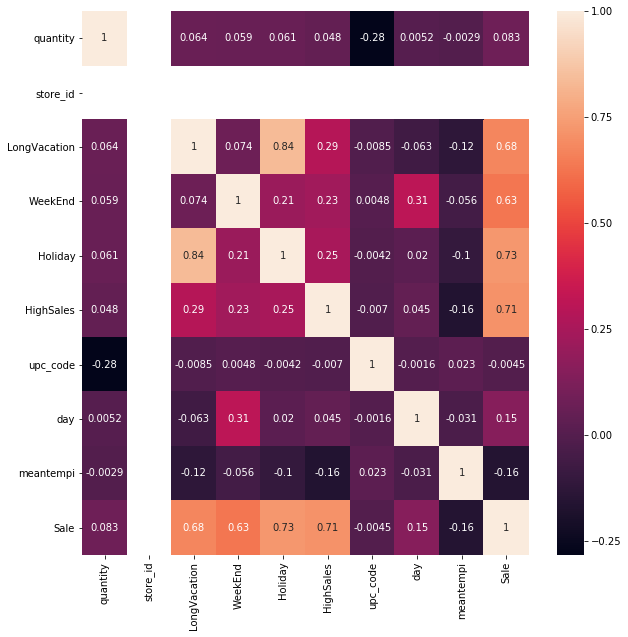

In [382]:
plt.figure(figsize=(10,10))
sns.heatmap(data_new.corr(),annot=True)

In [334]:
corr=data_new.corr()

In [346]:
len(data_new[data_new['Sale']==4])

90

In [383]:
data_updated=data_new[['quantity','Event','store_id','date','upc_code','day','Temp_Types','meantempi','Sale']]

In [384]:
data_updated.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9600 entries, 0 to 9599
Data columns (total 9 columns):
quantity      9600 non-null int64
Event         9600 non-null object
store_id      9600 non-null int64
date          9600 non-null datetime64[ns]
upc_code      9600 non-null float64
day           9600 non-null int64
Temp_Types    9600 non-null object
meantempi     9600 non-null int64
Sale          9600 non-null int64
dtypes: datetime64[ns](1), float64(1), int64(5), object(2)
memory usage: 750.0+ KB


In [385]:
data_updated.head()

,quantity,Event,store_id,date,upc_code,day,Temp_Types,meantempi,Sale
0,9,No Event,90,2018-05-01,710114.0,1,MODERATE,63,0
1,21,Prior Cinco de Mayo,90,2018-05-02,710114.0,2,MODERATE,63,0
2,19,Prior Cinco de Mayo,90,2018-05-03,710114.0,3,MODERATE,63,0
3,24,Prior Cinco de Mayo,90,2018-05-04,710114.0,4,MODERATE,63,0
4,36,Cinco de Mayo,90,2018-05-05,710114.0,5,MODERATE,63,1


In [386]:
cat_type = CategoricalDtype(categories=list(data_updated['upc_code'].unique()))

In [472]:
cat_type = CategoricalDtype(categories=list(dictTempLabels.keys()))

In [387]:
data_updated['upc_code']=data_updated['upc_code'].astype(cat_type)

C:\Users\syed.s\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [388]:
cat_type = CategoricalDtype(categories=list(data_updated['Event'].unique()))

In [389]:
data_updated['Event']=data_updated['Event'].astype(cat_type)

C:\Users\syed.s\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [390]:
le=LabelEncoder()

In [391]:
le.fit(data_updated['Event'])

LabelEncoder()

In [392]:
le.fit(data_updated['upc_code'])

LabelEncoder()

In [393]:
len(list(le.classes_))

34

In [281]:
data_updated['Event']=le.transform(data_updated['Event'])

C:\Users\syed.s\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [282]:
data_updated.head()

,quantity,Event,store_id,date,upc_code,day,Temp_Types,meantempi,Sale
0,9,16,90,2018-05-01,710114.0,1,MODERATE,63,0
1,21,21,90,2018-05-02,710114.0,2,MODERATE,63,0
2,19,21,90,2018-05-03,710114.0,3,MODERATE,63,0
3,24,21,90,2018-05-04,710114.0,4,MODERATE,63,0
4,36,1,90,2018-05-05,710114.0,5,MODERATE,63,1


In [395]:
updated_data=pd.get_dummies(data_updated,columns=['Event','upc_code'],drop_first=True)

In [396]:
updated_data.head()

,quantity,store_id,date,day,Temp_Types,meantempi,Sale,Event_Prior Cinco de Mayo,Event_Cinco de Mayo,Event_Prior Mother's day,...,upc_code_271011000000.0,upc_code_271078000000.0,upc_code_271124000000.0,upc_code_271181000000.0,upc_code_271211000000.0,upc_code_271241000000.0,upc_code_271281000000.0,upc_code_271291000000.0,upc_code_271292000000.0,upc_code_271311000000.0
0,9,90,2018-05-01,1,MODERATE,63,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,21,90,2018-05-02,2,MODERATE,63,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,19,90,2018-05-03,3,MODERATE,63,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,24,90,2018-05-04,4,MODERATE,63,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,36,90,2018-05-05,5,MODERATE,63,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [458]:
updated_data_new=updated_data[updated_data['Temp_Types']=='MODERATE']

In [459]:
updated_data_new.head()

,quantity,store_id,date,day,Temp_Types,meantempi,Sale,Event_Prior Cinco de Mayo,Event_Cinco de Mayo,Event_Prior Mother's day,...,upc_code_271011000000.0,upc_code_271078000000.0,upc_code_271124000000.0,upc_code_271181000000.0,upc_code_271211000000.0,upc_code_271241000000.0,upc_code_271281000000.0,upc_code_271291000000.0,upc_code_271292000000.0,upc_code_271311000000.0
0,9,90,2018-05-01,1,MODERATE,63,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,21,90,2018-05-02,2,MODERATE,63,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,19,90,2018-05-03,3,MODERATE,63,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,24,90,2018-05-04,4,MODERATE,63,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,36,90,2018-05-05,5,MODERATE,63,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [460]:
X=updated_data_new.drop(columns=['date','store_id','quantity','Temp_Types'])

In [461]:
y=updated_data_new['quantity']

In [462]:
X=minmax_scale(X)

In [464]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [465]:
re.fit(X_train,y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [466]:
predictions=re.predict(X_test)

In [467]:
print('R2',r2_score(y_test,predictions))

R2 0.5359259917389039


In [468]:
n_splits =100
temp = 0
for _ in range(n_splits):
    trainX, testX, trainy, testy = train_test_split(X, y, test_size=0.20)
    model = RandomForestRegressor()
    model.fit(trainX,trainy)
    train_acc = model.score(trainX,trainy)
    test_acc = model.score(testX,testy)
    print('train>%.3f' % train_acc)
    print('test>%.3f \n\n' % test_acc)
    if test_acc > temp and test_acc<train_acc:
        temp = test_acc
        final_X_train = trainX
        final_X_test = testX
        final_Y_train = trainy
        final_Y_test = testy 

C:\Users\syed.s\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


train>0.846
test>0.288 




C:\Users\syed.s\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


train>0.854
test>0.487 




C:\Users\syed.s\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


train>0.812
test>-0.995 




C:\Users\syed.s\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


train>0.857
test>0.450 




C:\Users\syed.s\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


train>0.866
test>0.438 




C:\Users\syed.s\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


train>0.848
test>0.098 




C:\Users\syed.s\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


train>0.786
test>0.237 




C:\Users\syed.s\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


train>0.856
test>0.369 


train>0.848
test>0.130 




C:\Users\syed.s\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\syed.s\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


train>0.846
test>0.379 


train>0.867
test>0.490 




C:\Users\syed.s\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\syed.s\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


train>0.867
test>0.442 




C:\Users\syed.s\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


train>0.844
test>0.307 


train>0.849
test>0.322 




C:\Users\syed.s\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\syed.s\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


train>0.814
test>0.390 


train>0.842
test>0.445 




C:\Users\syed.s\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\syed.s\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


train>0.816
test>0.285 




C:\Users\syed.s\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


train>0.832
test>0.194 


train>0.834
test>0.391 




C:\Users\syed.s\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\syed.s\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


train>0.840
test>0.111 




C:\Users\syed.s\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


train>0.846
test>0.378 


train>0.849
test>0.327 




C:\Users\syed.s\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\syed.s\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


train>0.833
test>0.368 


train>0.825
test>0.365 




C:\Users\syed.s\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\syed.s\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


train>0.812
test>0.380 


train>0.833
test>0.531 




C:\Users\syed.s\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\syed.s\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


train>0.839
test>0.328 




C:\Users\syed.s\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


train>0.831
test>0.129 


train>0.787
test>0.406 




C:\Users\syed.s\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\syed.s\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


train>0.771
test>0.350 


train>0.865
test>0.470 




C:\Users\syed.s\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\syed.s\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


train>0.864
test>-0.274 




C:\Users\syed.s\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


train>0.804
test>0.470 


train>0.870
test>0.473 




C:\Users\syed.s\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\syed.s\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


train>0.847
test>0.329 


train>0.844
test>0.213 




C:\Users\syed.s\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\syed.s\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


train>0.842
test>0.487 




C:\Users\syed.s\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


train>0.861
test>0.366 


train>0.783
test>-0.020 




C:\Users\syed.s\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\syed.s\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


train>0.850
test>0.070 


train>0.853
test>0.203 




C:\Users\syed.s\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\syed.s\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


train>0.810
test>0.237 


train>0.824
test>0.329 




C:\Users\syed.s\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\syed.s\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


train>0.796
test>0.312 




C:\Users\syed.s\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


train>0.821
test>0.407 


train>0.858
test>0.446 




C:\Users\syed.s\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\syed.s\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


train>0.853
test>-0.074 




C:\Users\syed.s\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


train>0.820
test>0.518 




C:\Users\syed.s\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


train>0.841
test>0.340 


train>0.720
test>0.511 




C:\Users\syed.s\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\syed.s\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


train>0.857
test>0.380 


train>0.795
test>0.084 




C:\Users\syed.s\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\syed.s\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


train>0.829
test>0.436 


train>0.821
test>0.051 




C:\Users\syed.s\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\syed.s\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


train>0.839
test>-0.244 


train>0.799
test>0.070 




C:\Users\syed.s\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\syed.s\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


train>0.869
test>0.461 


train>0.857
test>0.336 




C:\Users\syed.s\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\syed.s\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


train>0.859
test>0.127 




C:\Users\syed.s\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


train>0.829
test>0.445 




C:\Users\syed.s\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


train>0.823
test>-0.170 




C:\Users\syed.s\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


train>0.832
test>0.354 




C:\Users\syed.s\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


train>0.835
test>0.049 




C:\Users\syed.s\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


train>0.750
test>0.383 




C:\Users\syed.s\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


train>0.807
test>-0.139 




C:\Users\syed.s\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


train>0.828
test>0.343 




C:\Users\syed.s\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


train>0.868
test>0.360 




C:\Users\syed.s\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


train>0.812
test>0.456 




C:\Users\syed.s\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


train>0.869
test>0.456 




C:\Users\syed.s\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


train>0.834
test>-0.213 




C:\Users\syed.s\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


train>0.823
test>0.563 


train>0.813
test>0.523 




C:\Users\syed.s\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\syed.s\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


train>0.794
test>0.513 




C:\Users\syed.s\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


train>0.834
test>0.344 




C:\Users\syed.s\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


train>0.861
test>0.384 




C:\Users\syed.s\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


train>0.801
test>-1.191 


train>0.875
test>0.407 




C:\Users\syed.s\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\syed.s\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


train>0.862
test>0.410 




C:\Users\syed.s\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


train>0.843
test>0.454 




C:\Users\syed.s\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


train>0.857
test>0.409 




C:\Users\syed.s\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


train>0.845
test>0.237 




C:\Users\syed.s\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


train>0.817
test>0.341 




C:\Users\syed.s\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


train>0.836
test>0.402 


train>0.818
test>0.402 




C:\Users\syed.s\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\syed.s\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


train>0.849
test>0.016 


train>0.809
test>-0.193 




C:\Users\syed.s\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\syed.s\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


train>0.836
test>0.484 




C:\Users\syed.s\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


train>0.871
test>0.434 


train>0.832
test>0.392 




C:\Users\syed.s\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\syed.s\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


train>0.833
test>-0.623 


train>0.838
test>0.072 




C:\Users\syed.s\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\syed.s\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


train>0.840
test>0.329 


train>0.835
test>0.472 




C:\Users\syed.s\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\syed.s\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


train>0.861
test>0.475 


train>0.819
test>0.178 




C:\Users\syed.s\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\syed.s\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


train>0.836
test>0.395 


train>0.847
test>0.266 




C:\Users\syed.s\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\syed.s\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\syed.s\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


train>0.833
test>0.464 


train>0.834
test>0.498 


train>0.814
test>0.403 




C:\Users\syed.s\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [469]:
re.fit(final_X_train,final_Y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [470]:
predictions=re.predict(final_X_test)

In [471]:
print('R2',r2_score(final_Y_test,predictions))

R2 0.5613932622131901


In [423]:
le=learning_curve(re,X,y)

C:\Users\syed.s\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


In [424]:
le

(array([ 640, 2080, 3520, 4960, 6400]),
 array([[0.60996921, 0.88536871, 0.8936489 ],
        [0.62045575, 0.88661491, 0.91528431],
        [0.67766736, 0.90664273, 0.90467662],
        [0.68228196, 0.89649854, 0.86411702],
        [0.68855494, 0.88506876, 0.86804117]]),
 array([[ -0.11826667, -35.59781161, -28.67128457],
        [ -0.11879774, -34.74284882, -27.01058666],
        [ -0.12942607, -29.46365505, -27.29164953],
        [ -0.12387541, -30.77981402, -26.06827689],
        [ -0.14381273, -28.92780479, -24.9659654 ]]))

In [421]:
from sklearn.model_selection import learning_curve

In [154]:
train_sizes, train_scores, test_scores=learning_curve(re, 
                                                        X, 
                                                        y,
                                                        # Number of folds in cross-validation
                                                        cv=10,
                                                        # Evaluation metric
                                                        scoring='r2',
                                                        # Use all computer cores
                                                        n_jobs=-1, 
                                                        # 50 different sizes of the training set
                                                        train_sizes=np.linspace(0.01, 1.0, 50))

NameError: name 'learning_curve' is not defined

In [ ]:
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)

In [ ]:
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

In [ ]:
plt.plot(train_sizes, train_mean, '--', color="#111111",  label="Training score")
plt.plot(train_sizes, test_mean, color="#111111", label="Cross-validation score")

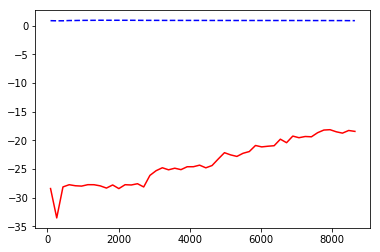

In [445]:
plt.plot(train_sizes, train_mean, '--', color="b",  label="Training score")
plt.plot(train_sizes, test_mean, color="r", label="Cross-validation score")


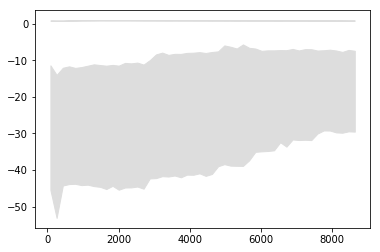

In [441]:
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color="#DDDDDD")
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, color="#DDDDDD")

No handles with labels found to put in legend.


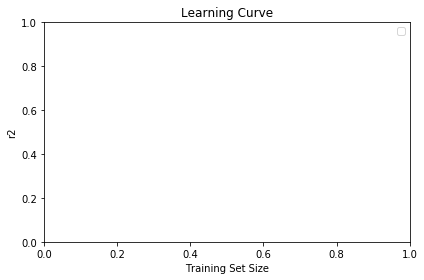

In [442]:
plt.title("Learning Curve")
plt.xlabel("Training Set Size"), plt.ylabel("r2"), plt.legend(loc="best")
plt.tight_layout()
plt.show()